In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

In [2]:
data_frame = pd.read_csv('magic04.data', header=None)
data_frame.columns = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
data_frame.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

Here we will predict the future sample weather class is g for `gamma` or h for `hadron`. 

In [3]:
data_frame['class'] = (data_frame['class'] == 'g').astype(int)
data_frame.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

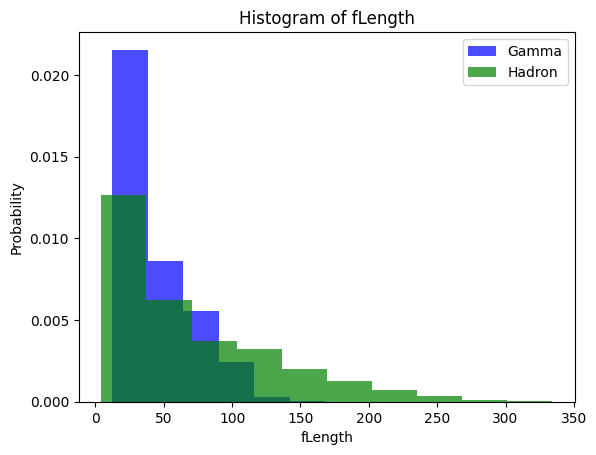

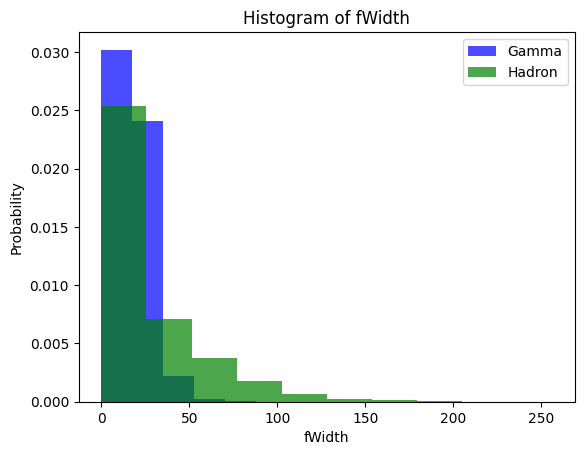

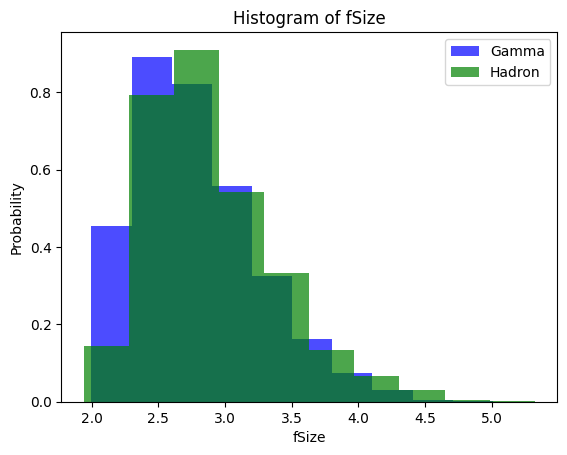

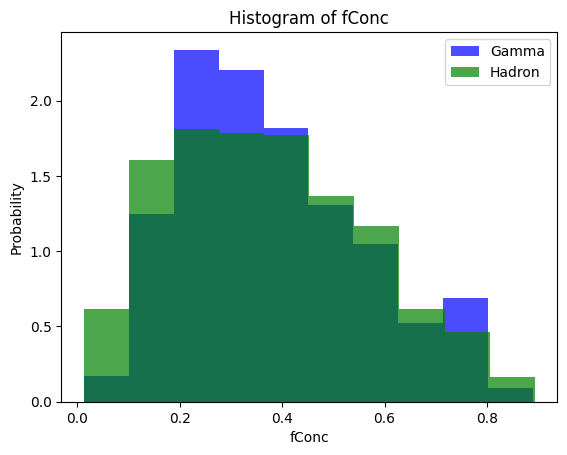

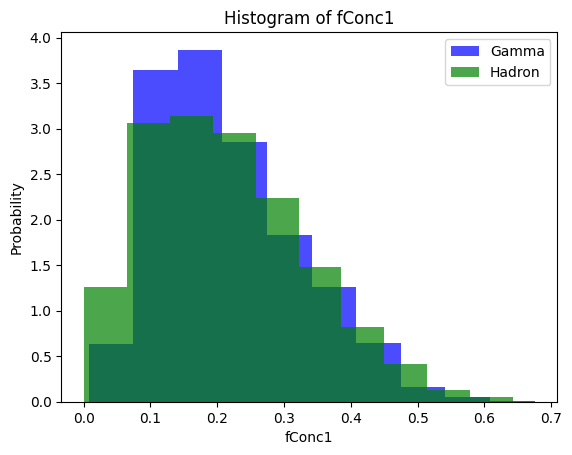

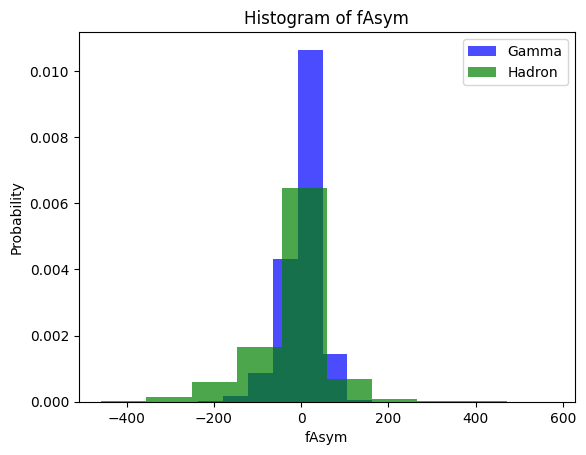

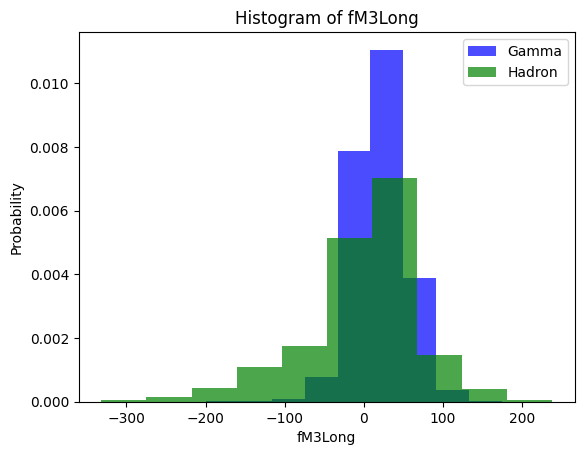

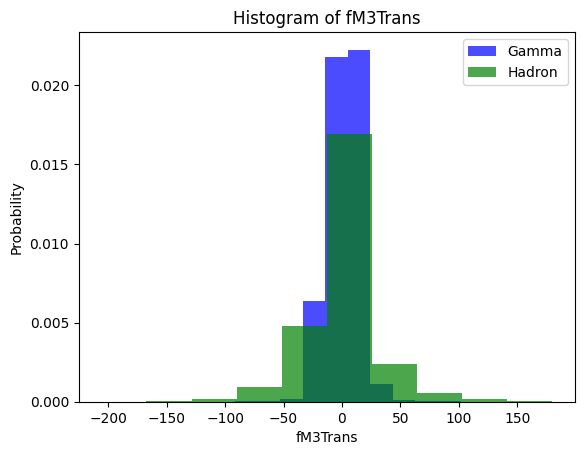

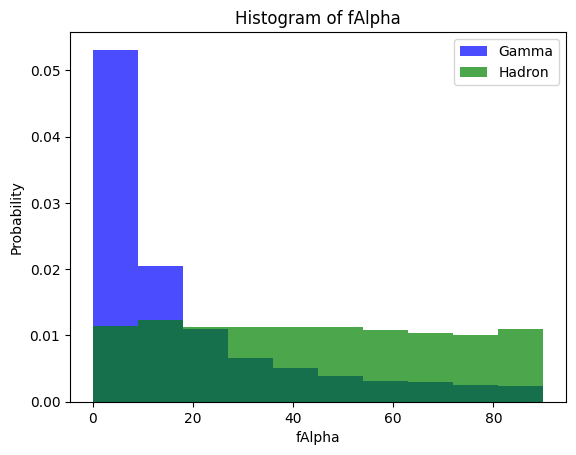

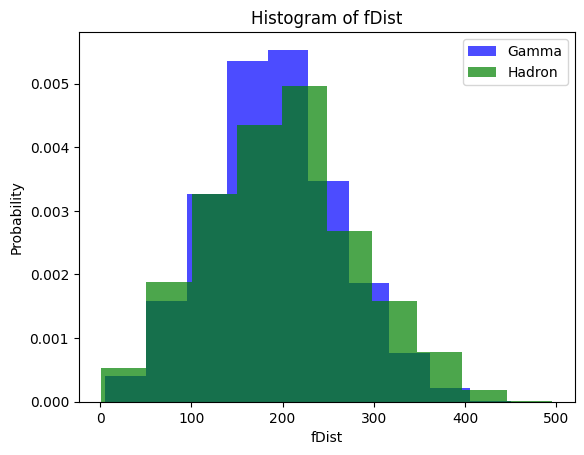

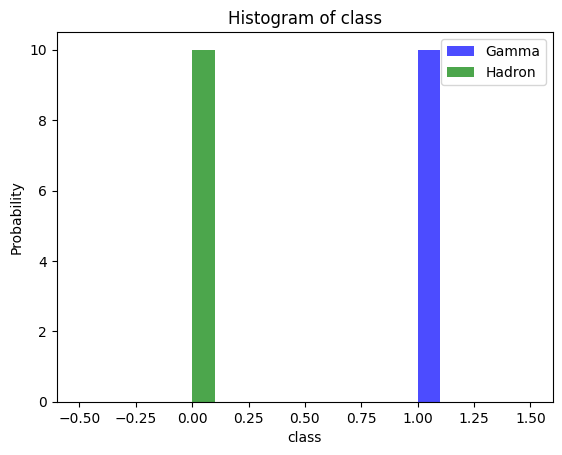

In [4]:
# Plot histograms for each feature

for column in data_frame.columns:
    plt.hist(data_frame[data_frame['class'] == 1][column], color="blue", alpha=0.7, label='Gamma', density=True)
    plt.hist(data_frame[data_frame['class'] == 0][column], color="green", alpha=0.7, label='Hadron', density=True)
    plt.xlabel(column)
    plt.ylabel('Probability')
    plt.title('Histogram of ' + column)
    plt.legend()
    plt.show()


# Train, Validation and Test Data

In [5]:
train, valid, test = np.split(data_frame.sample(frac=1),[int(0.6*len(data_frame)), int(0.8*len(data_frame))])
print(train.shape, valid.shape, test.shape)

(11412, 11) (3804, 11) (3804, 11)


It means that we have 60% of the data for training, 20% for validation and 20% for testing.

In [6]:
def scale_dataset(data_frame, oversample=False):
    X = data_frame[data_frame.columns[:-1]].values
    y = data_frame[data_frame.columns[-1]].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)

    data = np.hstack((X, np.reshape(y, (-1, 1))))

    return data, X, y

In [7]:
train, X_train, Y_train =scale_dataset(train, oversample=True)
valid, X_valid, Y_valid=scale_dataset(valid, oversample=False)
test, X_test, Y_test=scale_dataset(test, oversample=False)

# K-Nearest Neighbors

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [9]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [10]:
Y_pred = knn_model.predict(X_test)

In [11]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75      1358
           1       0.86      0.86      0.86      2446

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



In [12]:
Y_pred

array([1, 0, 1, ..., 0, 0, 1])

In [13]:
Y_test

array([1, 1, 1, ..., 0, 0, 0])

# Naive Bayes

In [14]:
from sklearn.naive_bayes import GaussianNB

In [15]:
nb_model = GaussianNB()
nb_model.fit(X_train, Y_train)

GaussianNB()

In [16]:
Y_pred = nb_model.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.72      0.41      0.52      1358
           1       0.74      0.91      0.81      2446

    accuracy                           0.73      3804
   macro avg       0.73      0.66      0.67      3804
weighted avg       0.73      0.73      0.71      3804



# Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
lg_model = LogisticRegression()
lg_model.fit(X_train, Y_train)

LogisticRegression()

In [19]:
y_pred = lg_model.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.72      0.41      0.52      1358
           1       0.74      0.91      0.81      2446

    accuracy                           0.73      3804
   macro avg       0.73      0.66      0.67      3804
weighted avg       0.73      0.73      0.71      3804



# Support Vector Machine (SVM)

In [20]:
from sklearn.svm import SVC

In [21]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, Y_train)


In [22]:
y_pred = svm_model.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.72      0.41      0.52      1358
           1       0.74      0.91      0.81      2446

    accuracy                           0.73      3804
   macro avg       0.73      0.66      0.67      3804
weighted avg       0.73      0.73      0.71      3804



# TensorFlow

## Neural Network

In [23]:
import tensorflow as tf

In [24]:
def train_model( X_train, Y_train, X_valid, Y_valid, epochs, batch_size, num_nodes, dropout_rate, learning_rate):
    nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(num_nodes, activation='relu'),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

    nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),loss='binary_crossentropy',metrics=['accuracy'])

    history = nn_model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_valid, Y_valid), verbose=0)

    return nn_model, history

In [25]:
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary Crossentropy')
    ax1.legend()
    ax1.grid(True)

    ax2.plot(history.history['accuracy'], label='accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    ax2.grid(True)

    plt.show()


Nodes: 16, Dropout Rate: 0, Learning Rate: 0.01, Batch Size: 32


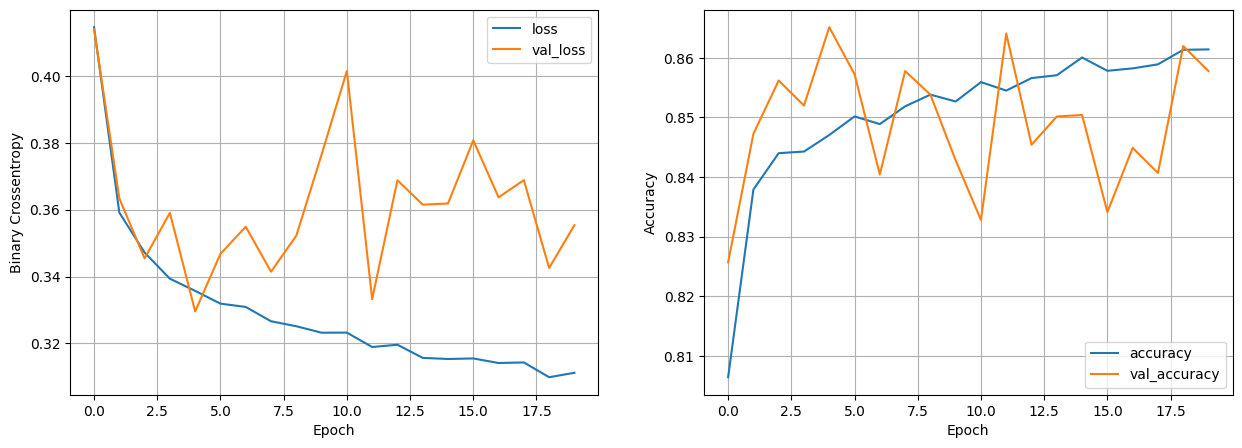

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1358
           1       0.88      0.91      0.90      2446

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804

Nodes: 16, Dropout Rate: 0, Learning Rate: 0.01, Batch Size: 64


C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


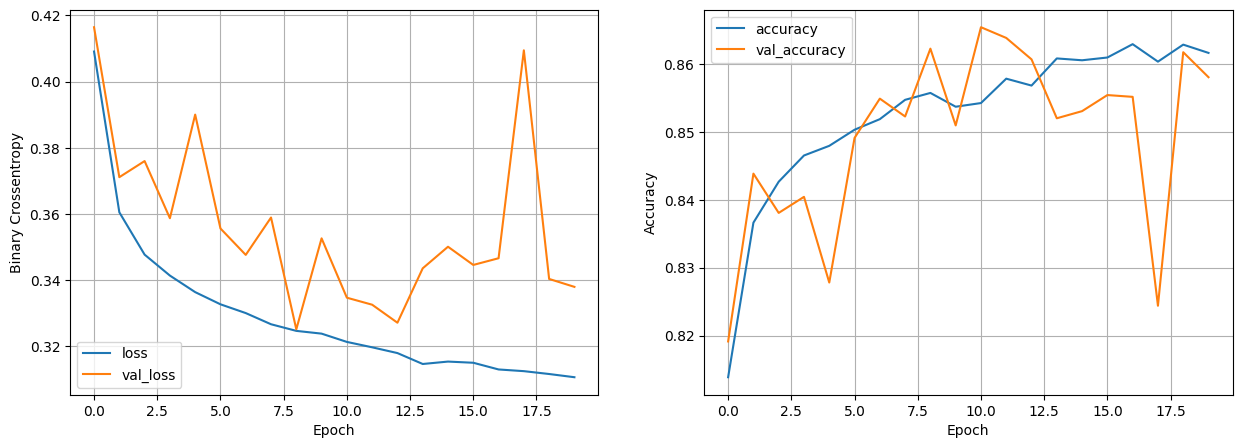

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1358
           1       0.88      0.91      0.90      2446

    accuracy                           0.87      3804
   macro avg       0.86      0.85      0.85      3804
weighted avg       0.86      0.87      0.86      3804

Nodes: 16, Dropout Rate: 0, Learning Rate: 0.01, Batch Size: 128


C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


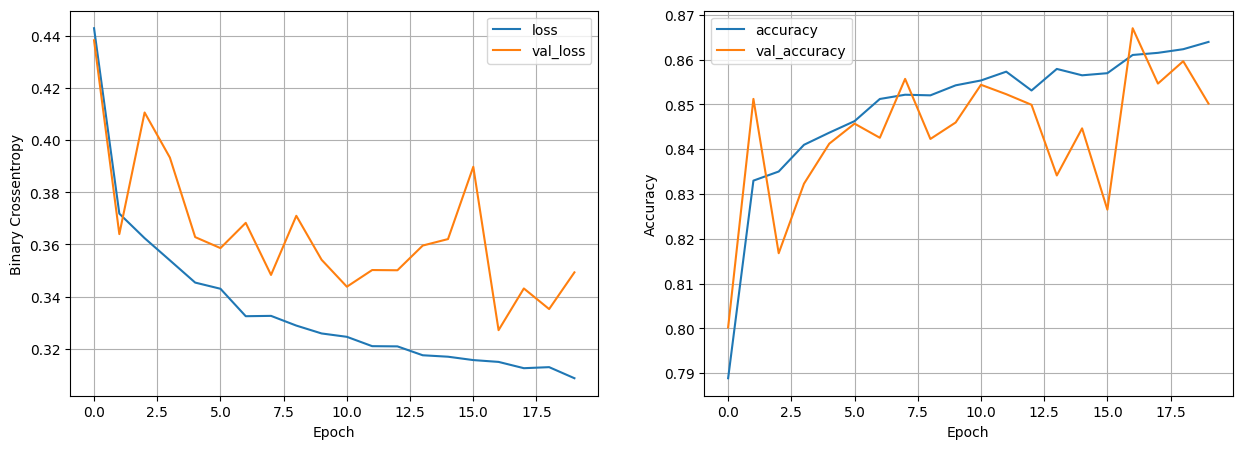

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1358
           1       0.90      0.89      0.89      2446

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804

Nodes: 16, Dropout Rate: 0, Learning Rate: 0.005, Batch Size: 32


C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


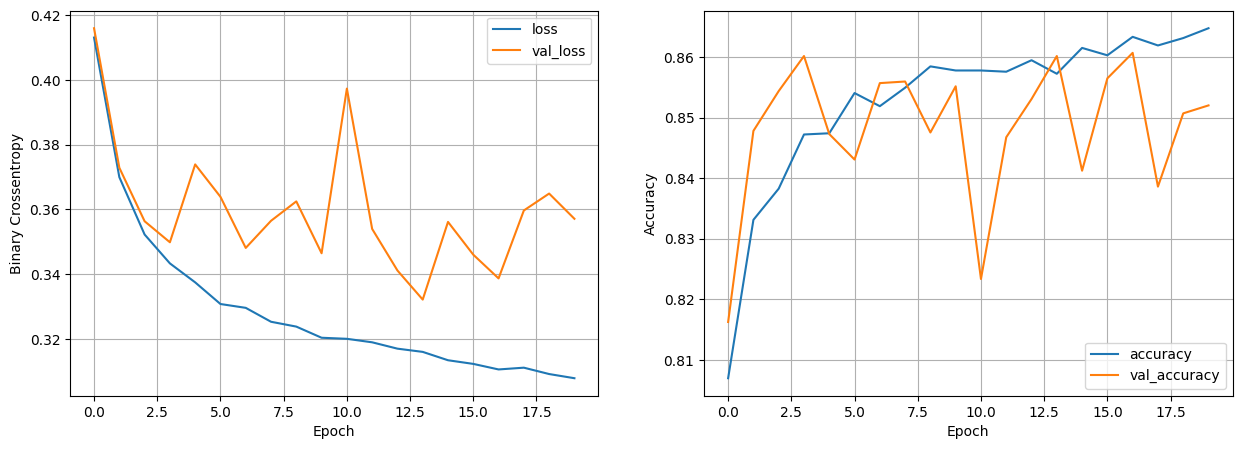

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

           0       0.80      0.81      0.81      1358
           1       0.90      0.89      0.89      2446

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804

Nodes: 16, Dropout Rate: 0, Learning Rate: 0.005, Batch Size: 64


C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


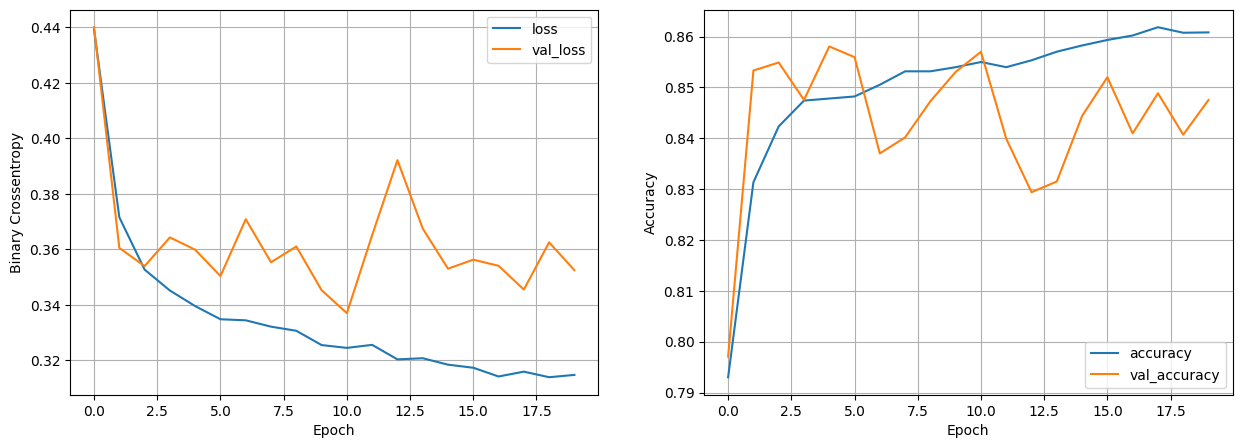

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1358
           1       0.90      0.88      0.89      2446

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804

Nodes: 16, Dropout Rate: 0, Learning Rate: 0.005, Batch Size: 128


C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


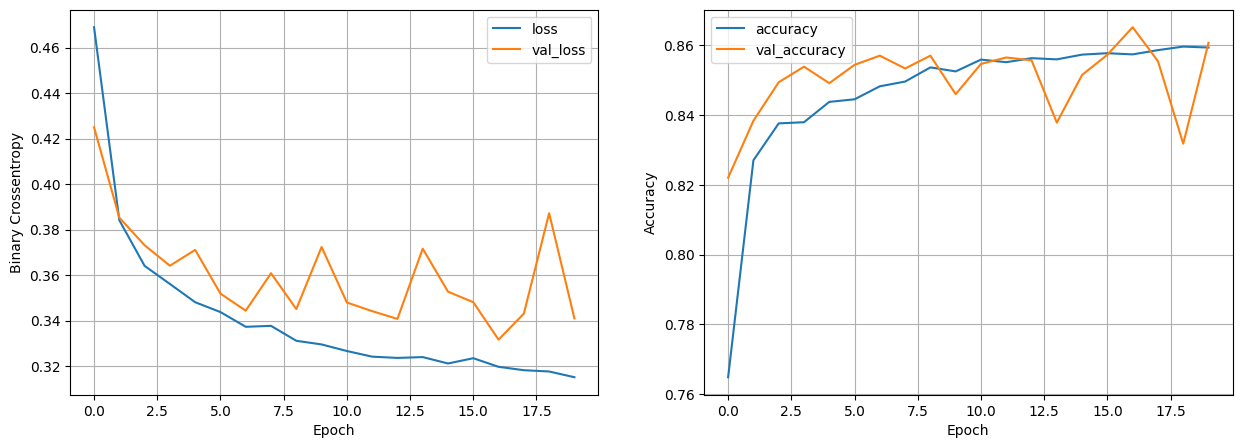

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1358
           1       0.89      0.90      0.90      2446

    accuracy                           0.87      3804
   macro avg       0.86      0.85      0.86      3804
weighted avg       0.87      0.87      0.87      3804

Nodes: 16, Dropout Rate: 0, Learning Rate: 0.0001, Batch Size: 32


C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


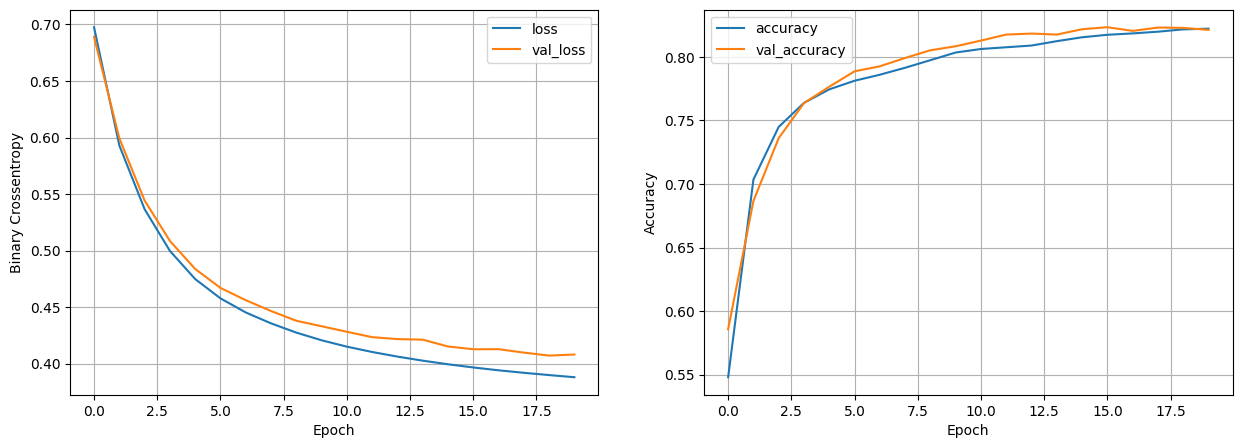

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.75      0.79      0.77      1358
           1       0.88      0.85      0.87      2446

    accuracy                           0.83      3804
   macro avg       0.81      0.82      0.82      3804
weighted avg       0.83      0.83      0.83      3804

Nodes: 16, Dropout Rate: 0, Learning Rate: 0.0001, Batch Size: 64


C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


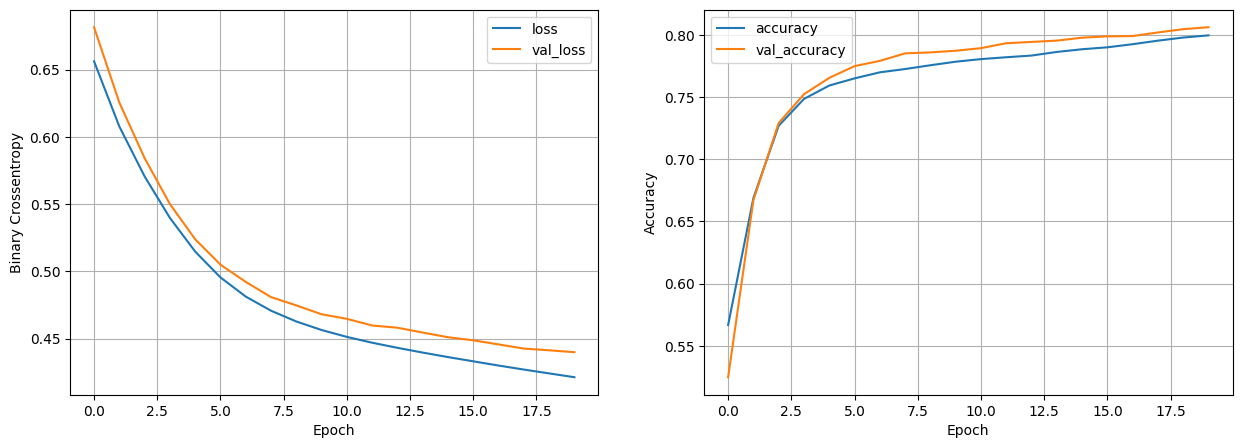

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.73      0.76      0.75      1358
           1       0.86      0.84      0.85      2446

    accuracy                           0.81      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.81      0.82      3804

Nodes: 16, Dropout Rate: 0, Learning Rate: 0.0001, Batch Size: 128


C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


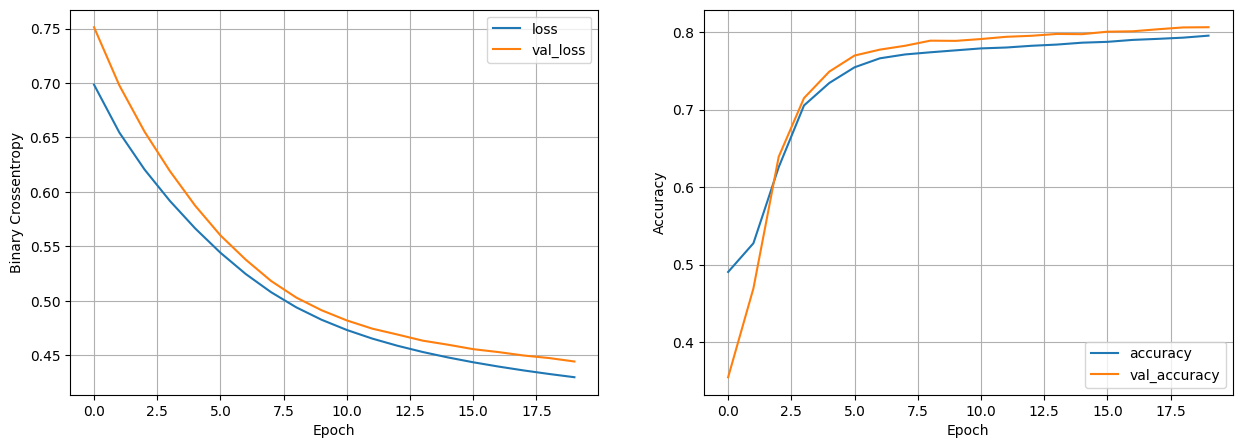

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.74      0.74      0.74      1358
           1       0.85      0.86      0.86      2446

    accuracy                           0.81      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.81      0.81      0.81      3804

Nodes: 16, Dropout Rate: 0.2, Learning Rate: 0.01, Batch Size: 32


C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


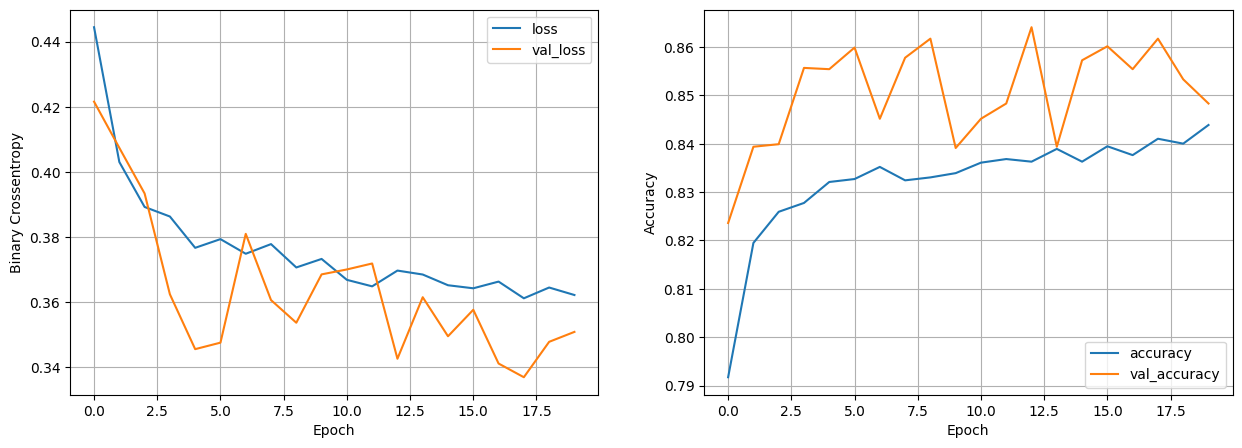

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.82      0.79      0.80      1358
           1       0.89      0.90      0.89      2446

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804

Nodes: 16, Dropout Rate: 0.2, Learning Rate: 0.01, Batch Size: 64


C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


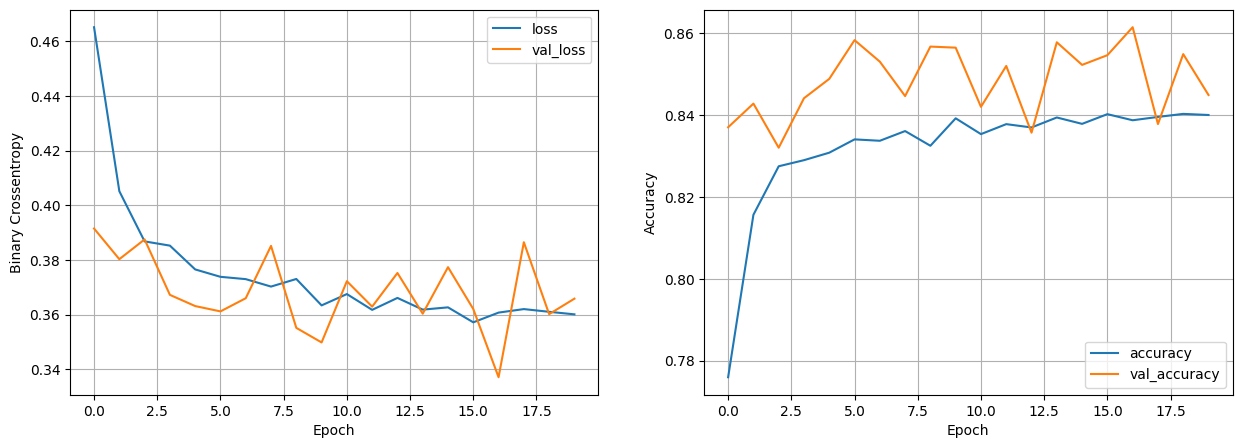

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       0.79      0.82      0.81      1358
           1       0.90      0.88      0.89      2446

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804

Nodes: 16, Dropout Rate: 0.2, Learning Rate: 0.01, Batch Size: 128


C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


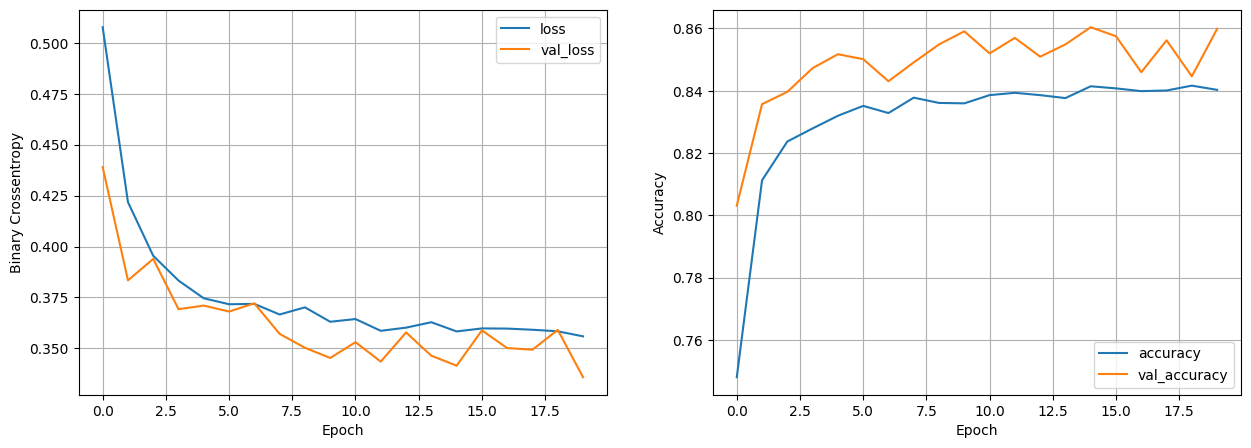

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.85      0.77      0.81      1358
           1       0.88      0.92      0.90      2446

    accuracy                           0.87      3804
   macro avg       0.86      0.85      0.85      3804
weighted avg       0.87      0.87      0.87      3804

Nodes: 16, Dropout Rate: 0.2, Learning Rate: 0.005, Batch Size: 32


C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


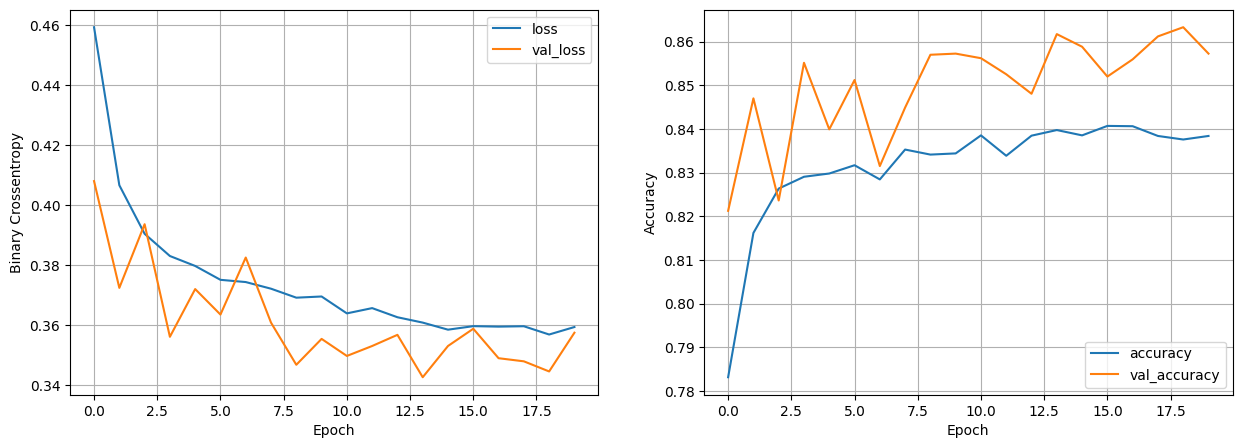

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

           0       0.86      0.78      0.82      1358
           1       0.88      0.93      0.91      2446

    accuracy                           0.88      3804
   macro avg       0.87      0.85      0.86      3804
weighted avg       0.87      0.88      0.87      3804

Nodes: 16, Dropout Rate: 0.2, Learning Rate: 0.005, Batch Size: 64


C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


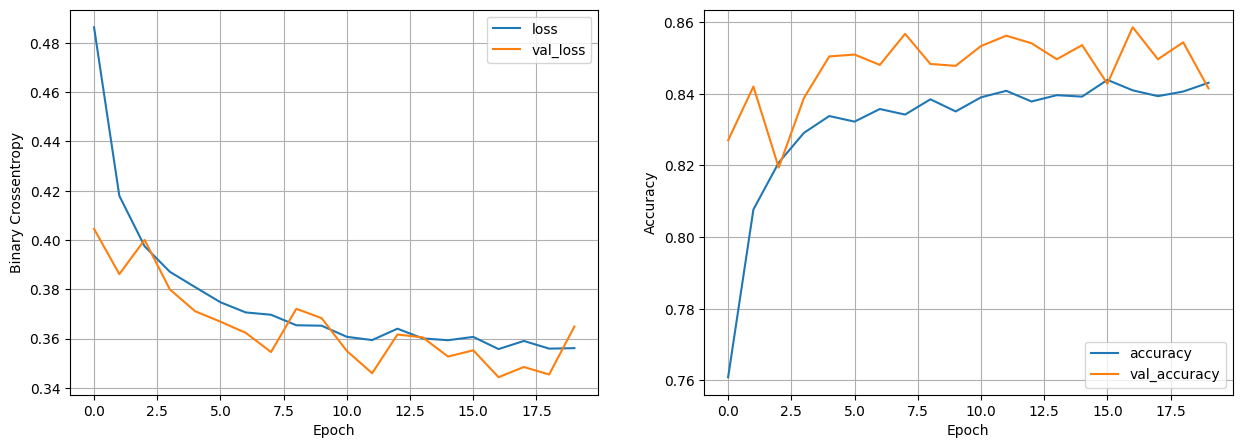

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       0.79      0.83      0.81      1358
           1       0.90      0.88      0.89      2446

    accuracy                           0.86      3804
   macro avg       0.84      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804

Nodes: 16, Dropout Rate: 0.2, Learning Rate: 0.005, Batch Size: 128


C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


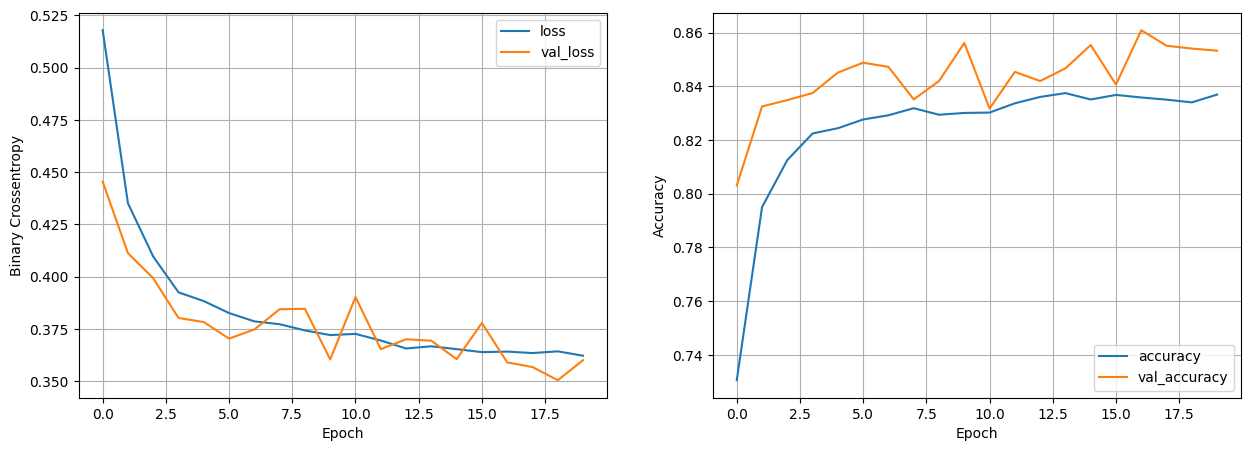

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.84      0.79      0.81      1358
           1       0.89      0.91      0.90      2446

    accuracy                           0.87      3804
   macro avg       0.86      0.85      0.86      3804
weighted avg       0.87      0.87      0.87      3804

Nodes: 16, Dropout Rate: 0.2, Learning Rate: 0.0001, Batch Size: 32


C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


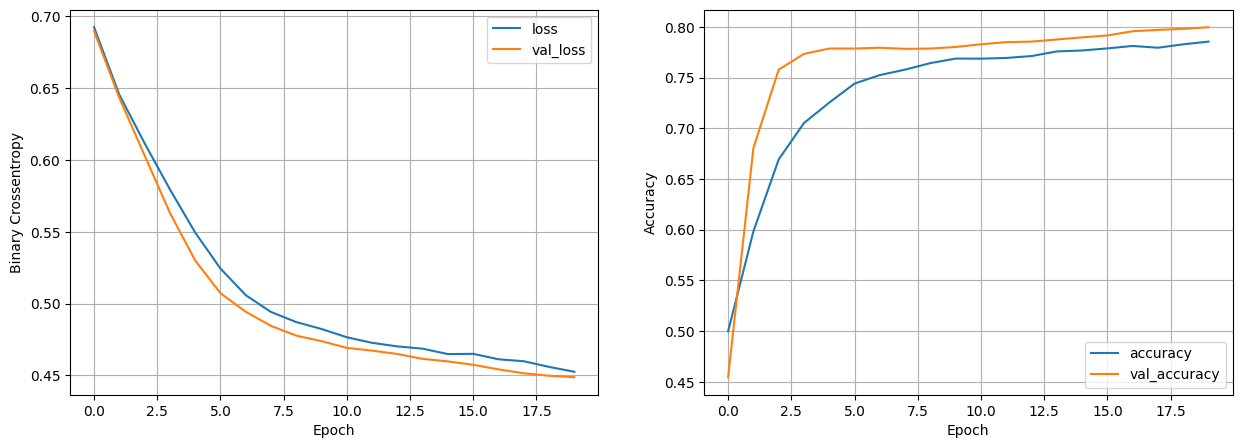

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.72      0.76      0.74      1358
           1       0.86      0.84      0.85      2446

    accuracy                           0.81      3804
   macro avg       0.79      0.80      0.80      3804
weighted avg       0.81      0.81      0.81      3804

Nodes: 16, Dropout Rate: 0.2, Learning Rate: 0.0001, Batch Size: 64


C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


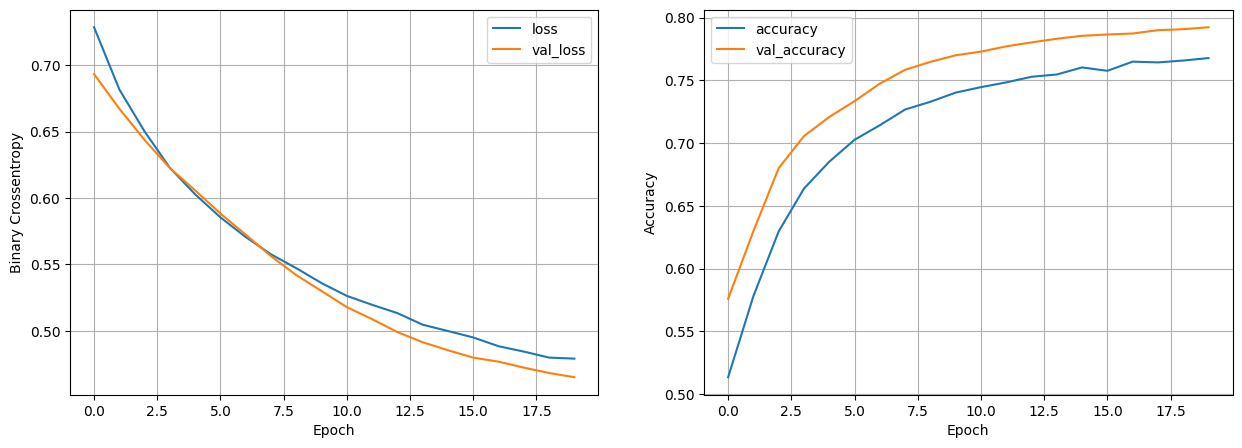

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       0.75      0.70      0.73      1358
           1       0.84      0.87      0.86      2446

    accuracy                           0.81      3804
   macro avg       0.80      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804

Nodes: 16, Dropout Rate: 0.2, Learning Rate: 0.0001, Batch Size: 128


C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


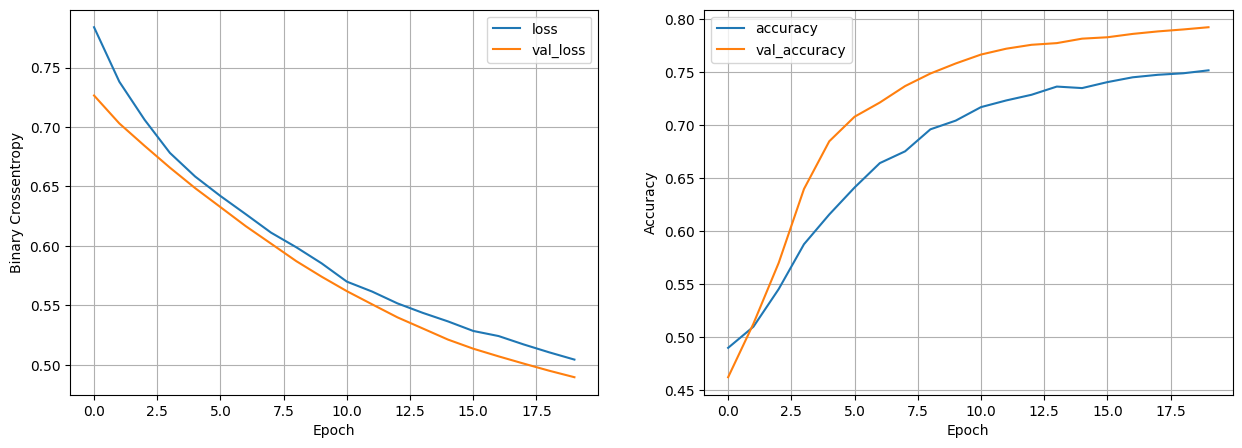

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.72      0.71      0.72      1358
           1       0.84      0.84      0.84      2446

    accuracy                           0.80      3804
   macro avg       0.78      0.78      0.78      3804
weighted avg       0.80      0.80      0.80      3804

Nodes: 32, Dropout Rate: 0, Learning Rate: 0.01, Batch Size: 32


C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


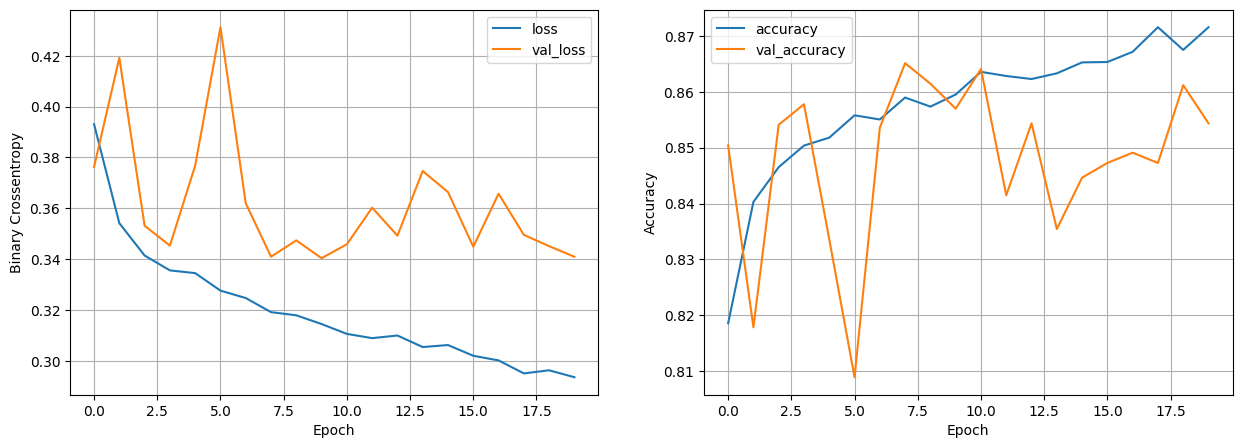

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

           0       0.84      0.77      0.81      1358
           1       0.88      0.92      0.90      2446

    accuracy                           0.87      3804
   macro avg       0.86      0.85      0.85      3804
weighted avg       0.87      0.87      0.87      3804

Nodes: 32, Dropout Rate: 0, Learning Rate: 0.01, Batch Size: 64


C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


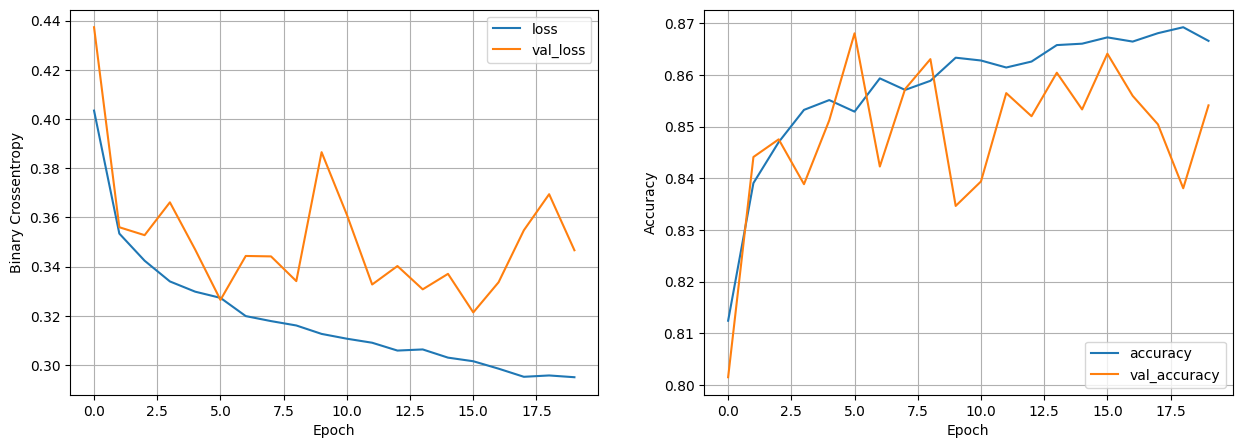

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1358
           1       0.89      0.90      0.90      2446

    accuracy                           0.87      3804
   macro avg       0.86      0.85      0.86      3804
weighted avg       0.87      0.87      0.87      3804

Nodes: 32, Dropout Rate: 0, Learning Rate: 0.01, Batch Size: 128


C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


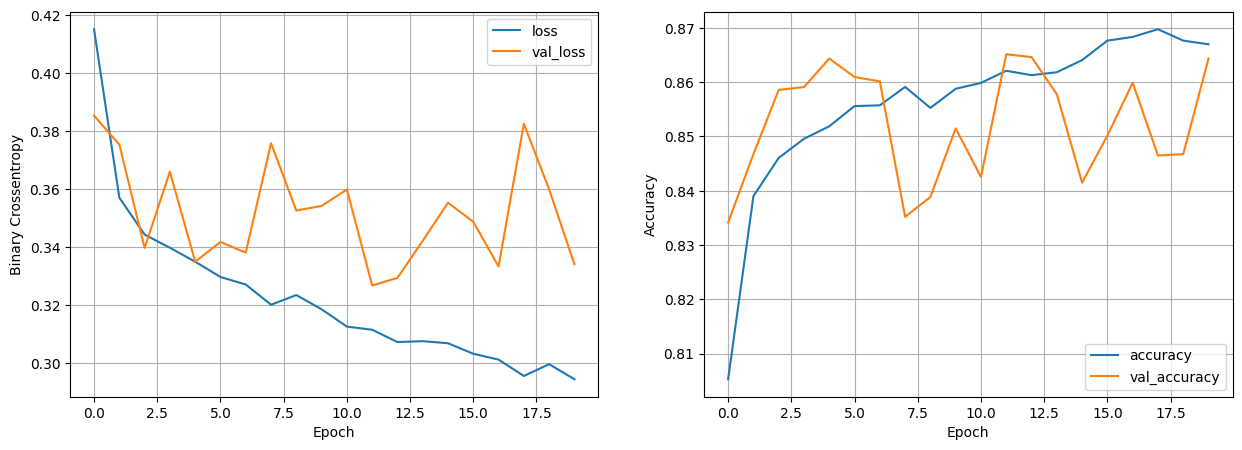

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

           0       0.85      0.78      0.81      1358
           1       0.88      0.92      0.90      2446

    accuracy                           0.87      3804
   macro avg       0.87      0.85      0.86      3804
weighted avg       0.87      0.87      0.87      3804

Nodes: 32, Dropout Rate: 0, Learning Rate: 0.005, Batch Size: 32


C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


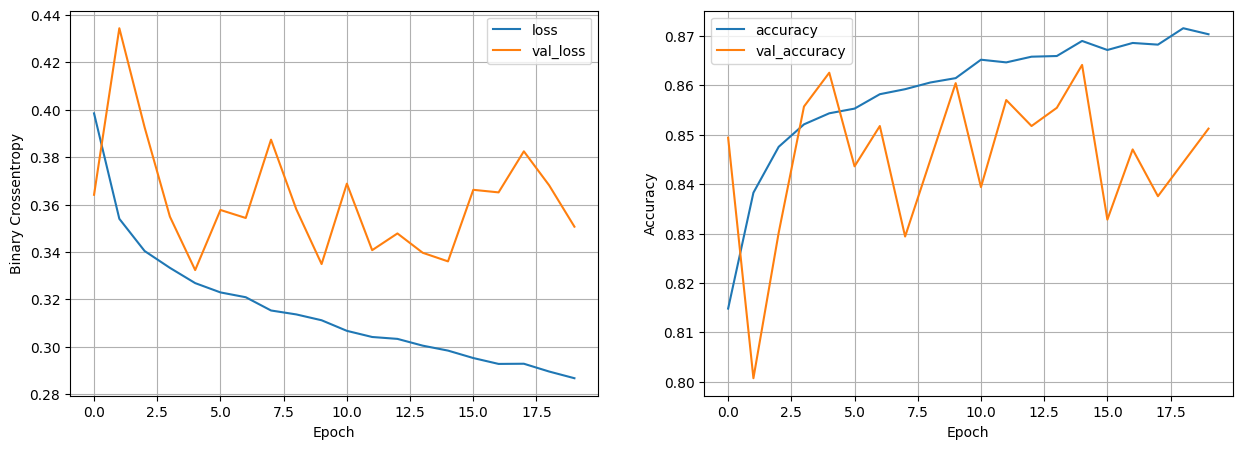

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1358
           1       0.90      0.90      0.90      2446

    accuracy                           0.87      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.87      0.87      0.87      3804

Nodes: 32, Dropout Rate: 0, Learning Rate: 0.005, Batch Size: 64


C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


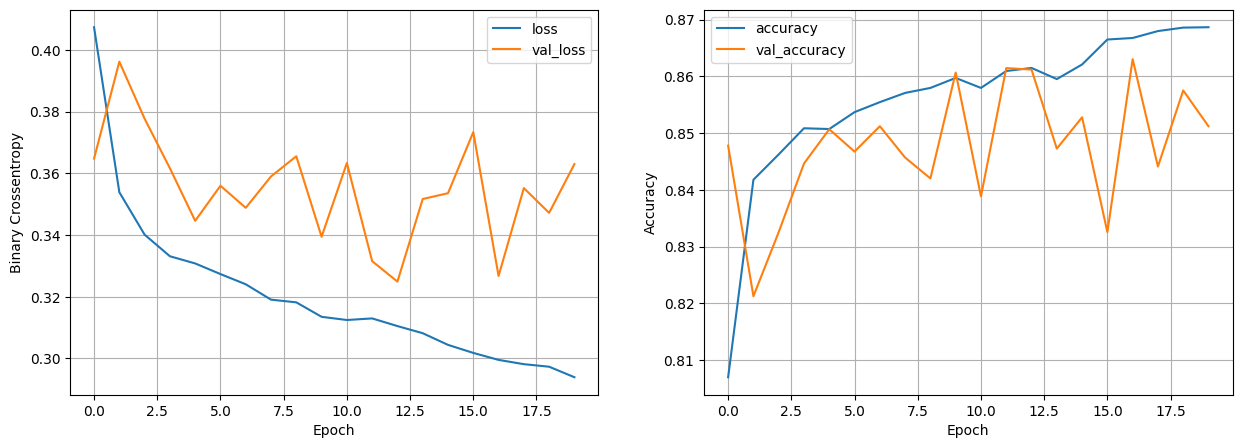

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.80      0.83      0.81      1358
           1       0.91      0.88      0.89      2446

    accuracy                           0.86      3804
   macro avg       0.85      0.86      0.85      3804
weighted avg       0.87      0.86      0.87      3804

Nodes: 32, Dropout Rate: 0, Learning Rate: 0.005, Batch Size: 128


C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


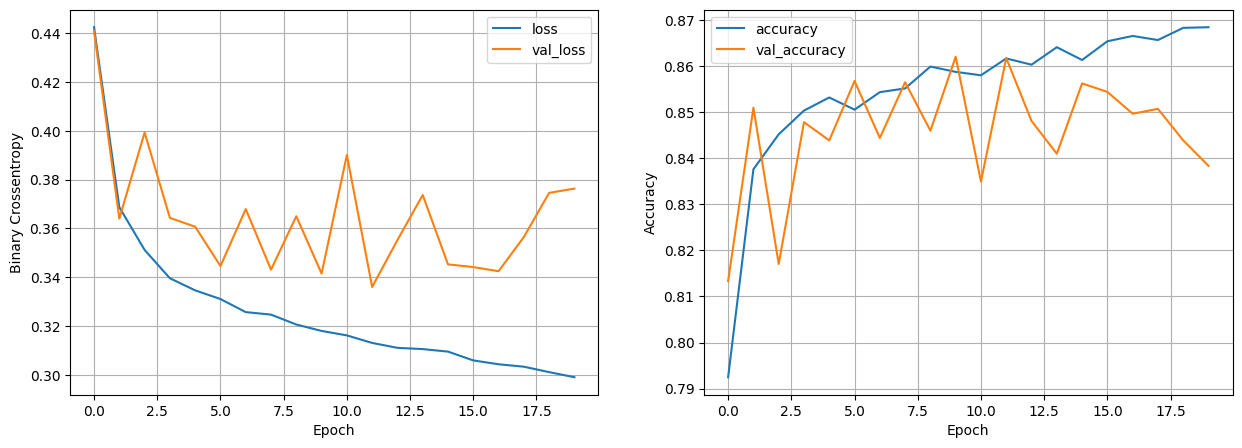

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       0.78      0.84      0.81      1358
           1       0.91      0.87      0.89      2446

    accuracy                           0.86      3804
   macro avg       0.84      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804

Nodes: 32, Dropout Rate: 0, Learning Rate: 0.0001, Batch Size: 32


C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


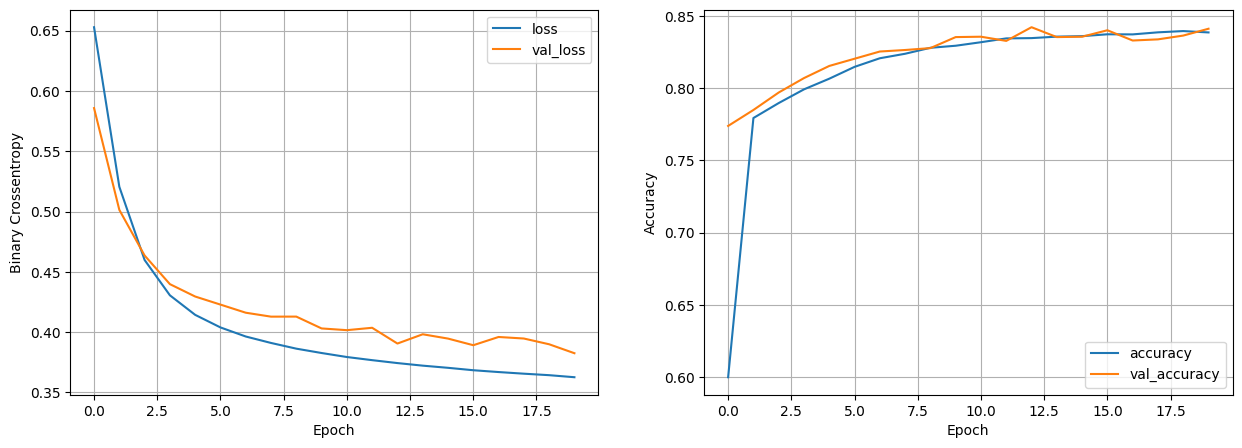

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1358
           1       0.88      0.89      0.88      2446

    accuracy                           0.85      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.85      0.85      0.85      3804

Nodes: 32, Dropout Rate: 0, Learning Rate: 0.0001, Batch Size: 64


C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


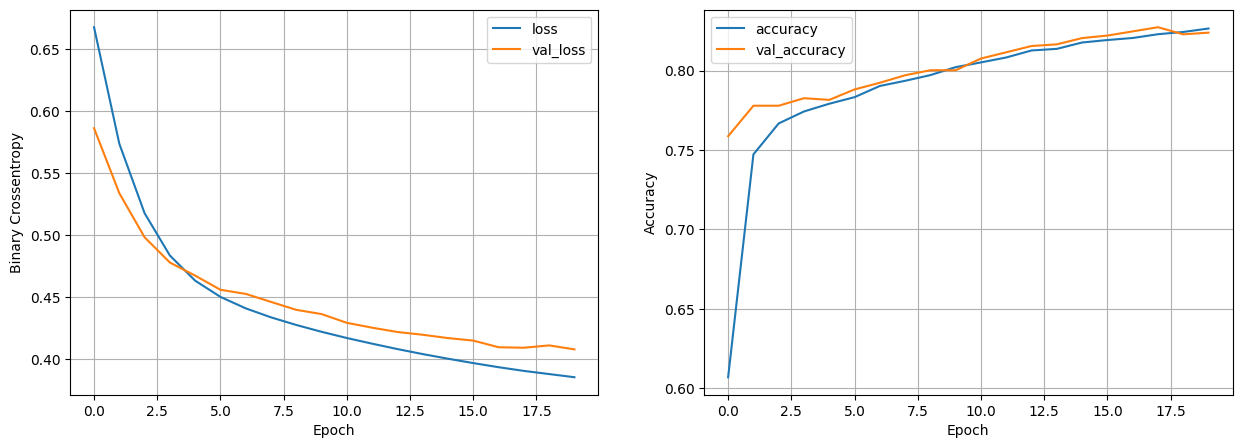

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

           0       0.76      0.80      0.78      1358
           1       0.89      0.86      0.87      2446

    accuracy                           0.84      3804
   macro avg       0.82      0.83      0.83      3804
weighted avg       0.84      0.84      0.84      3804

Nodes: 32, Dropout Rate: 0, Learning Rate: 0.0001, Batch Size: 128


C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


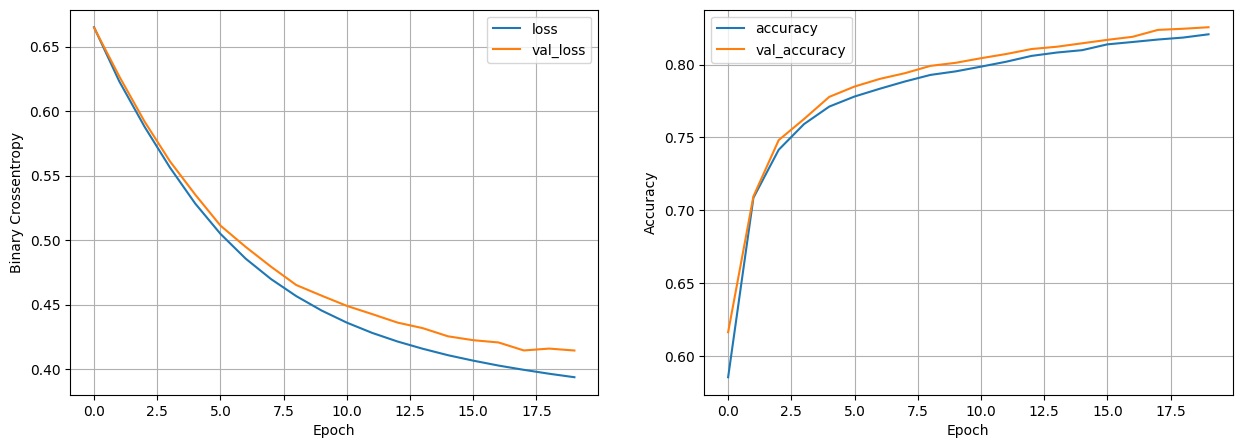

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.75      0.78      0.77      1358
           1       0.88      0.86      0.87      2446

    accuracy                           0.83      3804
   macro avg       0.81      0.82      0.82      3804
weighted avg       0.83      0.83      0.83      3804

Nodes: 32, Dropout Rate: 0.2, Learning Rate: 0.01, Batch Size: 32


C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


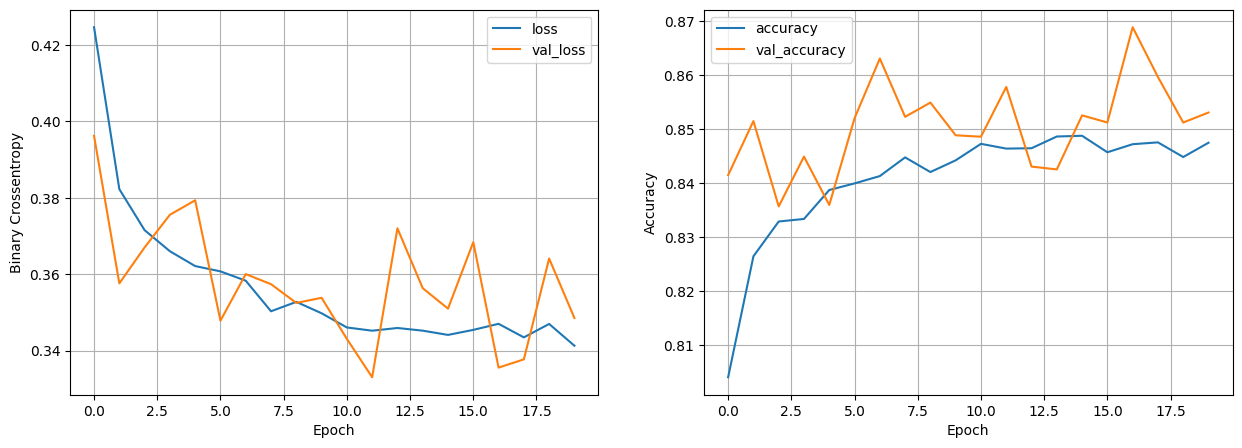

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1358
           1       0.90      0.90      0.90      2446

    accuracy                           0.87      3804
   macro avg       0.86      0.86      0.86      3804
weighted avg       0.87      0.87      0.87      3804

Nodes: 32, Dropout Rate: 0.2, Learning Rate: 0.01, Batch Size: 64


C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


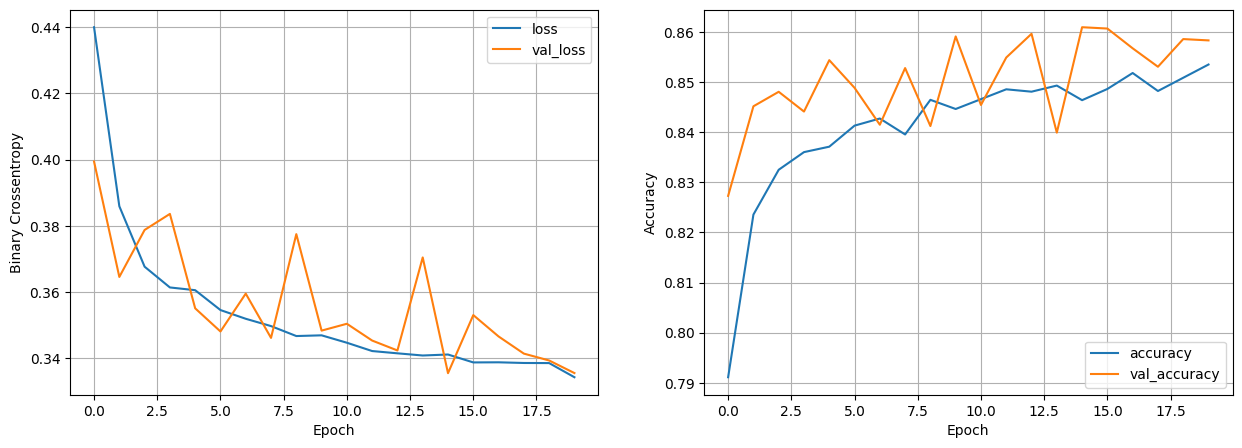

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       0.84      0.78      0.81      1358
           1       0.88      0.92      0.90      2446

    accuracy                           0.87      3804
   macro avg       0.86      0.85      0.85      3804
weighted avg       0.87      0.87      0.87      3804

Nodes: 32, Dropout Rate: 0.2, Learning Rate: 0.01, Batch Size: 128


C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


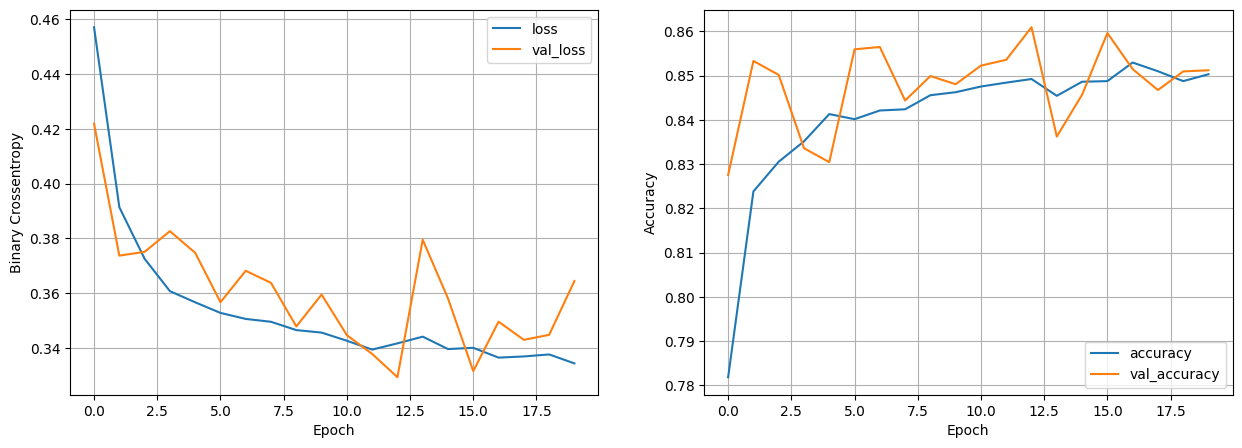

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1358
           1       0.90      0.89      0.90      2446

    accuracy                           0.87      3804
   macro avg       0.85      0.86      0.86      3804
weighted avg       0.87      0.87      0.87      3804

Nodes: 32, Dropout Rate: 0.2, Learning Rate: 0.005, Batch Size: 32


C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


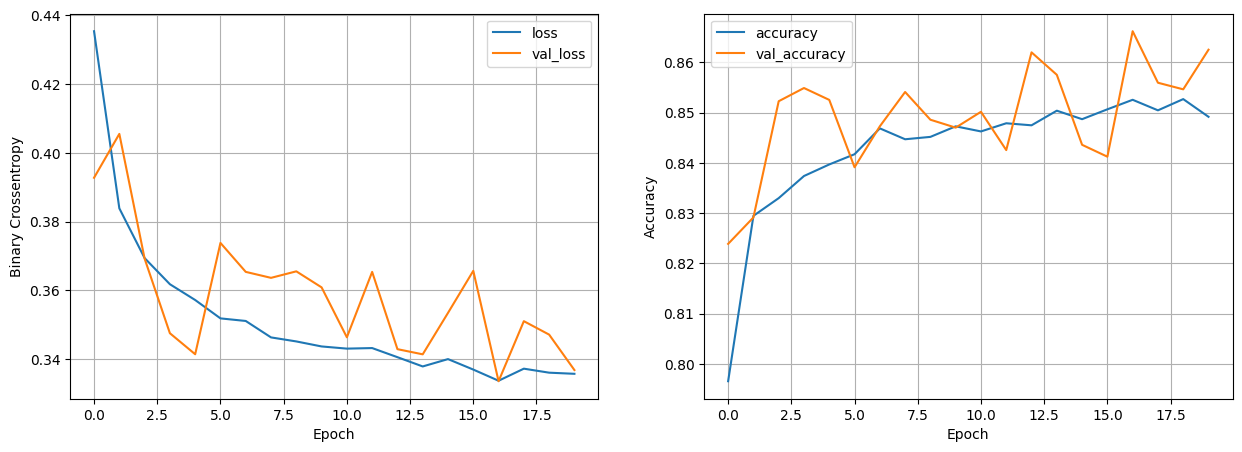

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1358
           1       0.89      0.91      0.90      2446

    accuracy                           0.87      3804
   macro avg       0.87      0.86      0.86      3804
weighted avg       0.87      0.87      0.87      3804

Nodes: 32, Dropout Rate: 0.2, Learning Rate: 0.005, Batch Size: 64


C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


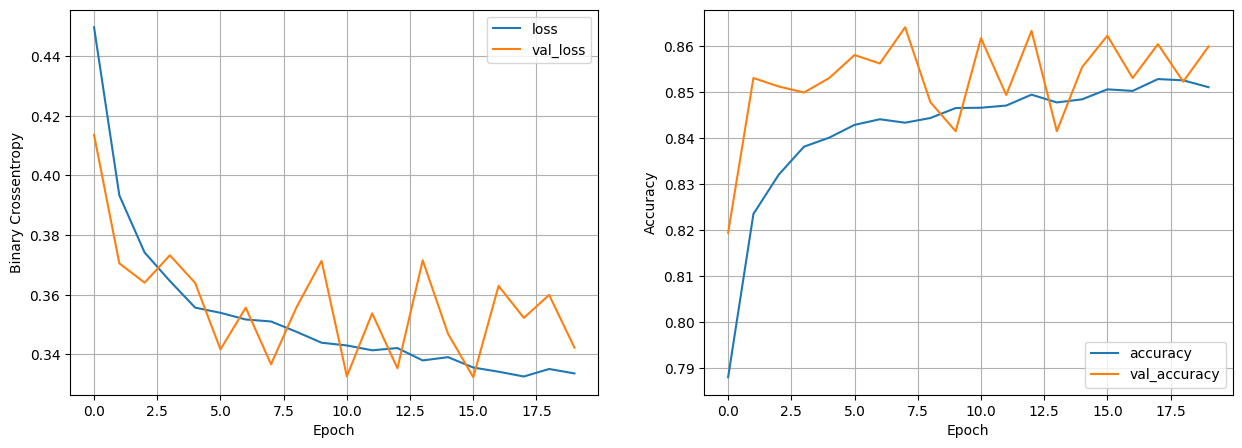

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

           0       0.85      0.78      0.81      1358
           1       0.89      0.92      0.90      2446

    accuracy                           0.87      3804
   macro avg       0.87      0.85      0.86      3804
weighted avg       0.87      0.87      0.87      3804

Nodes: 32, Dropout Rate: 0.2, Learning Rate: 0.005, Batch Size: 128


C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


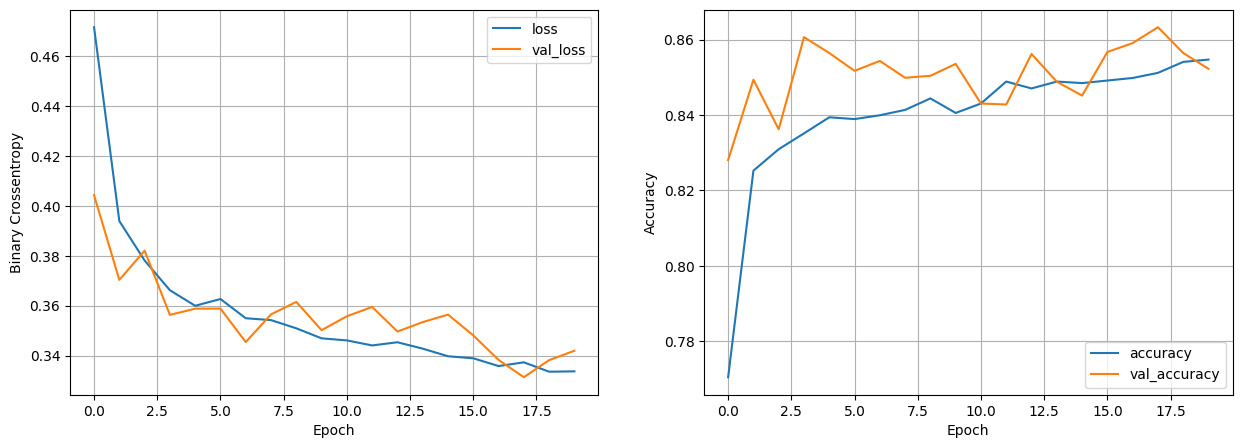

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1358
           1       0.90      0.90      0.90      2446

    accuracy                           0.87      3804
   macro avg       0.86      0.86      0.86      3804
weighted avg       0.87      0.87      0.87      3804

Nodes: 32, Dropout Rate: 0.2, Learning Rate: 0.0001, Batch Size: 32


C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


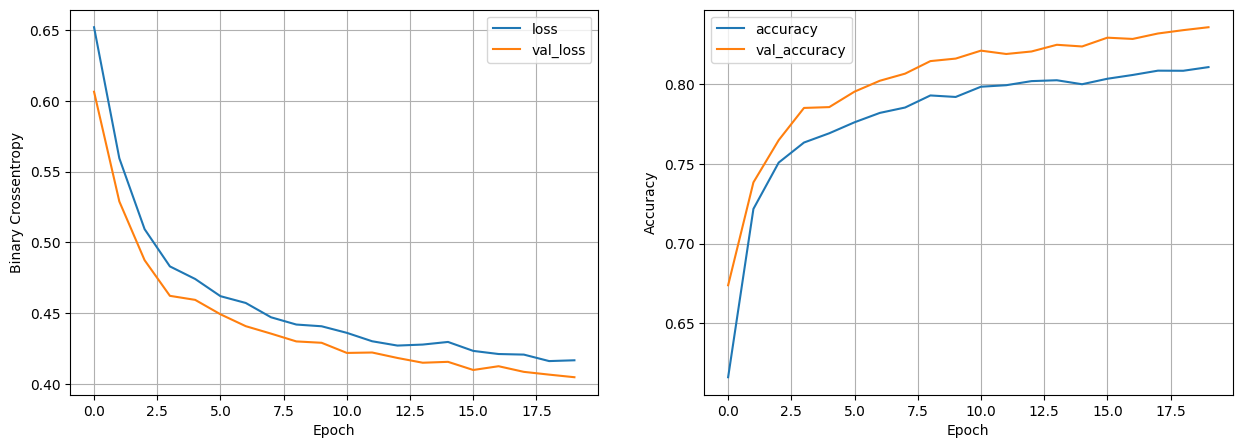

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.77      0.79      0.78      1358
           1       0.88      0.87      0.87      2446

    accuracy                           0.84      3804
   macro avg       0.82      0.83      0.83      3804
weighted avg       0.84      0.84      0.84      3804

Nodes: 32, Dropout Rate: 0.2, Learning Rate: 0.0001, Batch Size: 64


C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


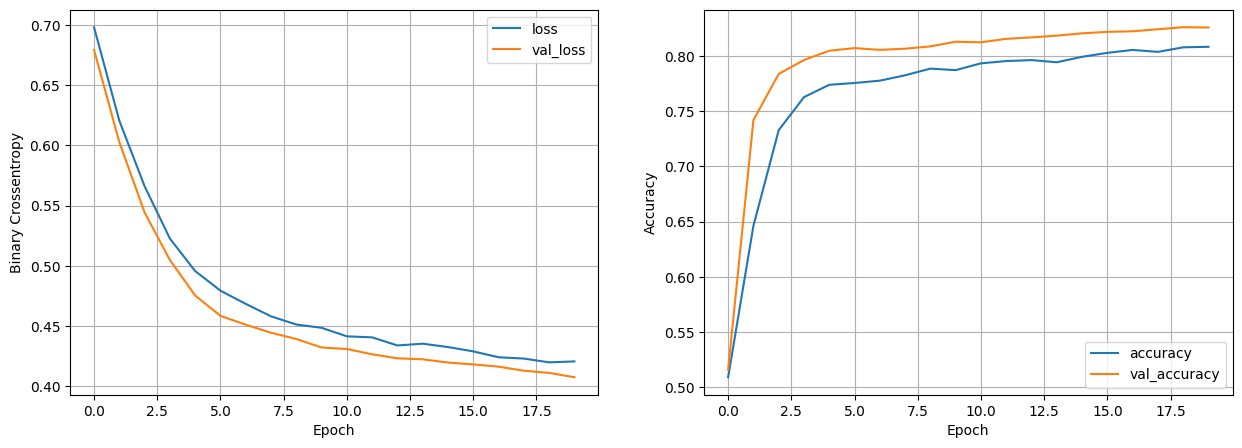

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.77      0.78      0.78      1358
           1       0.88      0.87      0.87      2446

    accuracy                           0.84      3804
   macro avg       0.82      0.83      0.83      3804
weighted avg       0.84      0.84      0.84      3804

Nodes: 32, Dropout Rate: 0.2, Learning Rate: 0.0001, Batch Size: 128


C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


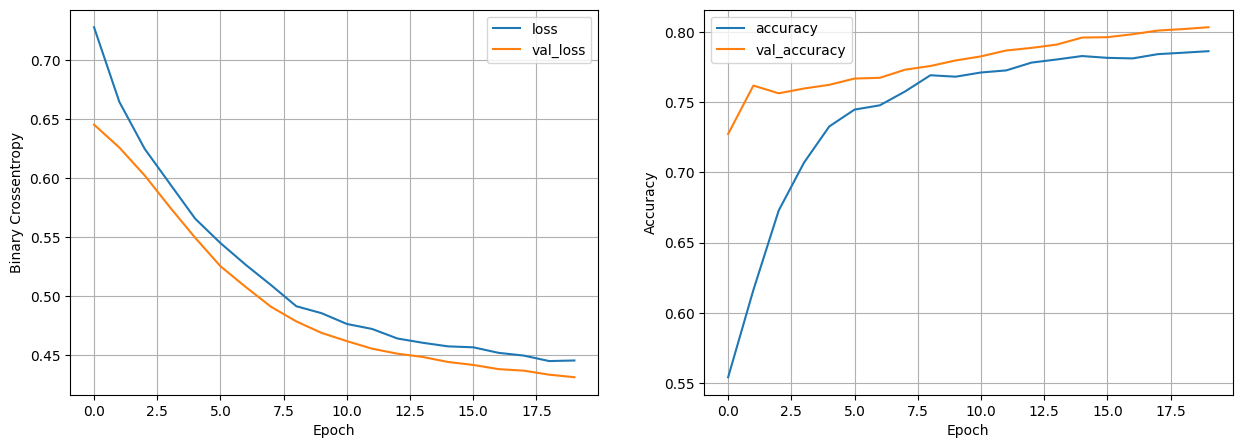

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.73      0.77      0.75      1358
           1       0.87      0.85      0.86      2446

    accuracy                           0.82      3804
   macro avg       0.80      0.81      0.80      3804
weighted avg       0.82      0.82      0.82      3804

Nodes: 64, Dropout Rate: 0, Learning Rate: 0.01, Batch Size: 32


C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


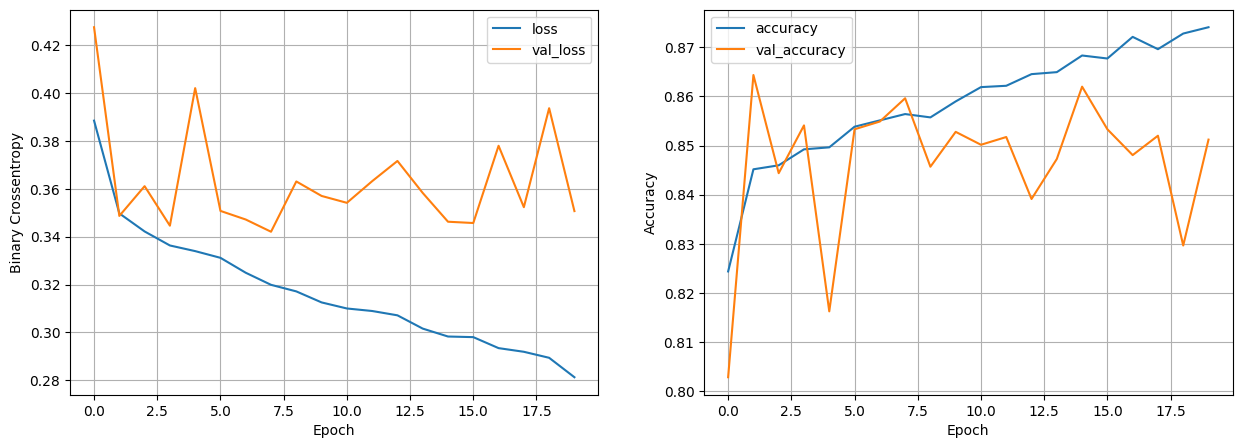

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1358
           1       0.89      0.89      0.89      2446

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804

Nodes: 64, Dropout Rate: 0, Learning Rate: 0.01, Batch Size: 64


C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


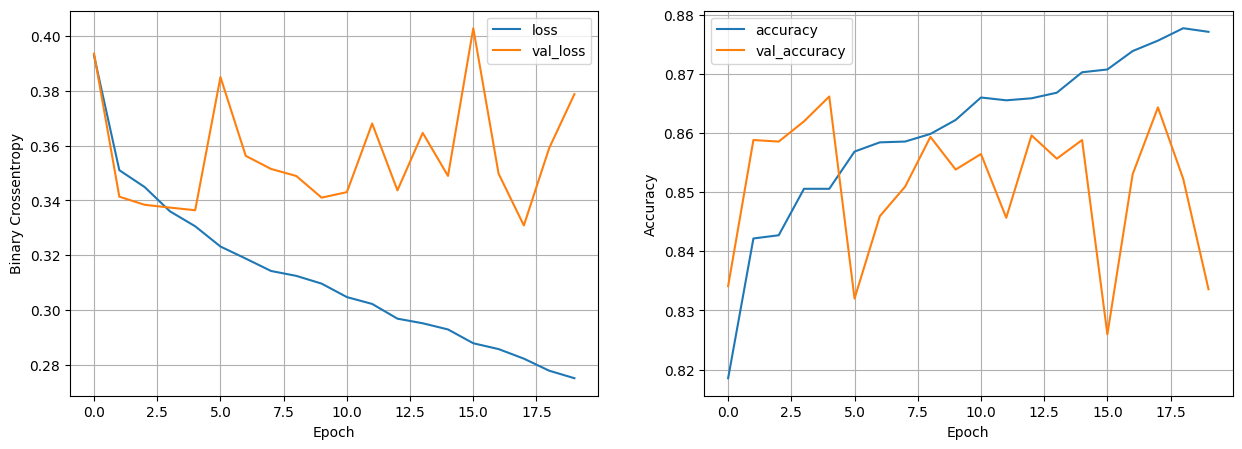

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
              precision    recall  f1-score   support

           0       0.77      0.83      0.80      1358
           1       0.90      0.86      0.88      2446

    accuracy                           0.85      3804
   macro avg       0.83      0.84      0.84      3804
weighted avg       0.85      0.85      0.85      3804

Nodes: 64, Dropout Rate: 0, Learning Rate: 0.01, Batch Size: 128


C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


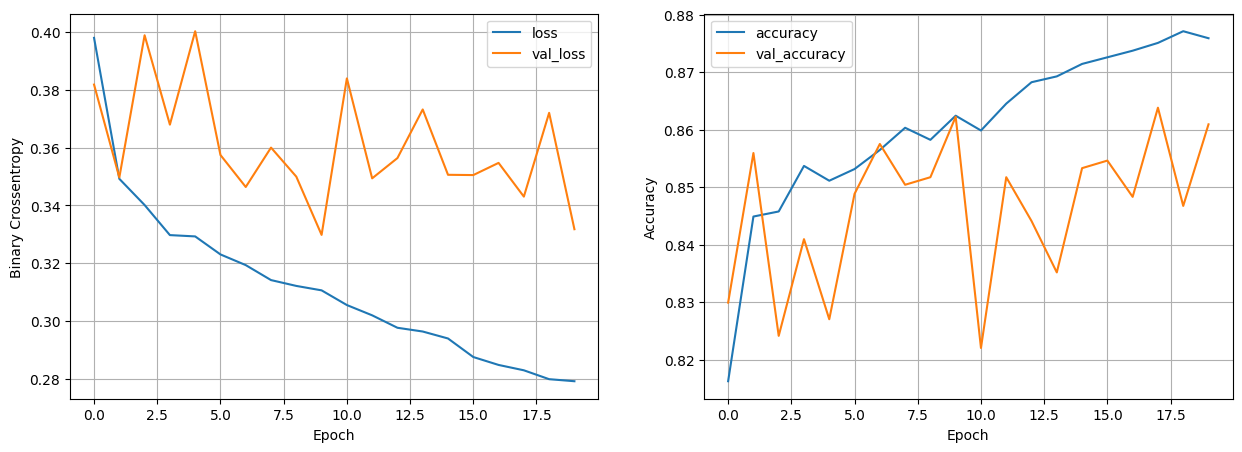

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
              precision    recall  f1-score   support

           0       0.86      0.78      0.81      1358
           1       0.88      0.93      0.90      2446

    accuracy                           0.87      3804
   macro avg       0.87      0.85      0.86      3804
weighted avg       0.87      0.87      0.87      3804

Nodes: 64, Dropout Rate: 0, Learning Rate: 0.005, Batch Size: 32


C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


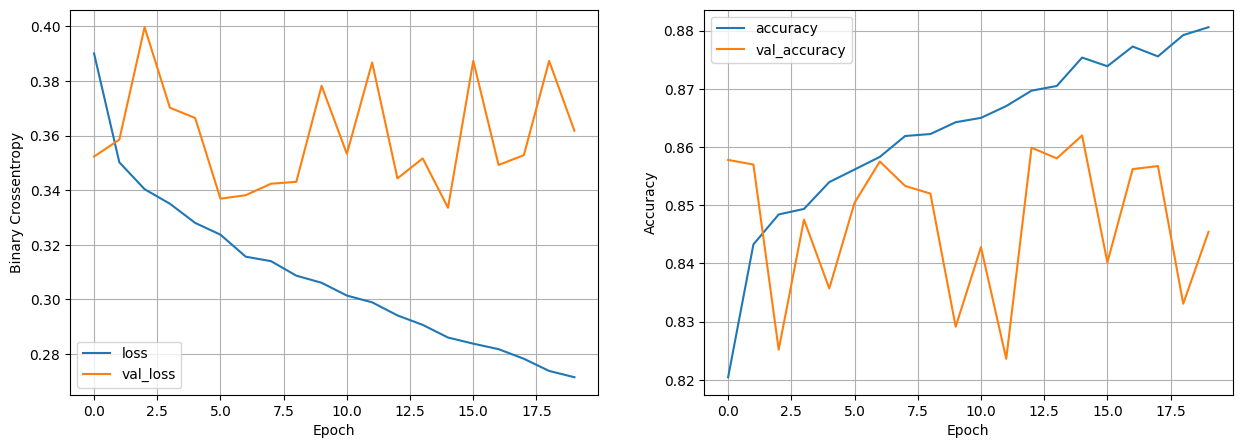

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

           0       0.79      0.82      0.80      1358
           1       0.90      0.88      0.89      2446

    accuracy                           0.86      3804
   macro avg       0.84      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804

Nodes: 64, Dropout Rate: 0, Learning Rate: 0.005, Batch Size: 64


C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


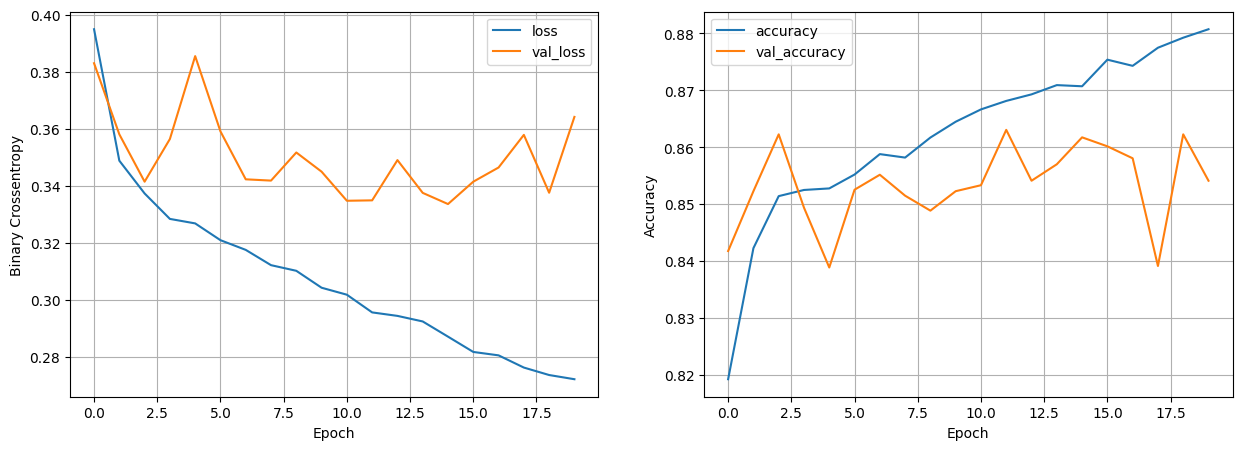

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1358
           1       0.89      0.89      0.89      2446

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804

Nodes: 64, Dropout Rate: 0, Learning Rate: 0.005, Batch Size: 128


C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


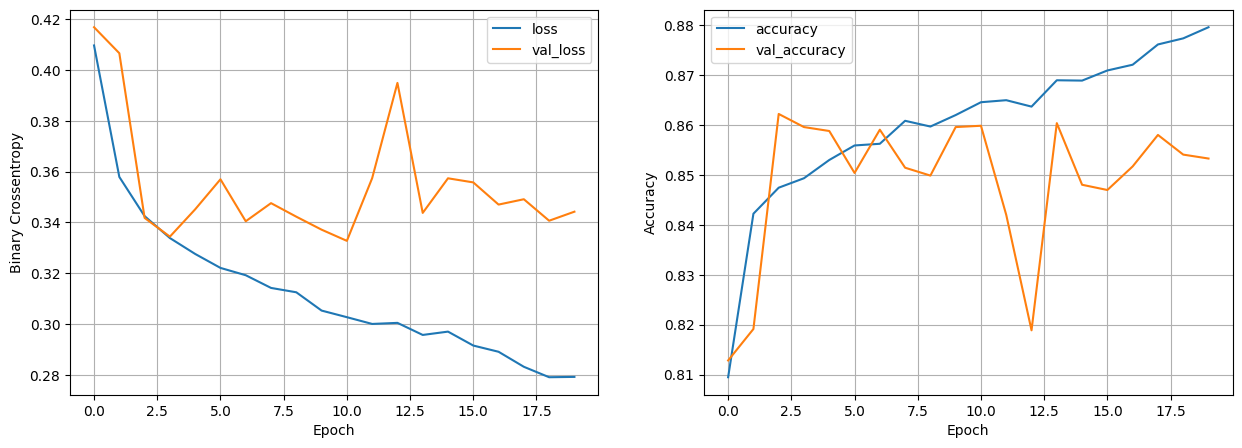

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1358
           1       0.89      0.90      0.90      2446

    accuracy                           0.87      3804
   macro avg       0.86      0.85      0.86      3804
weighted avg       0.87      0.87      0.87      3804

Nodes: 64, Dropout Rate: 0, Learning Rate: 0.0001, Batch Size: 32


C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


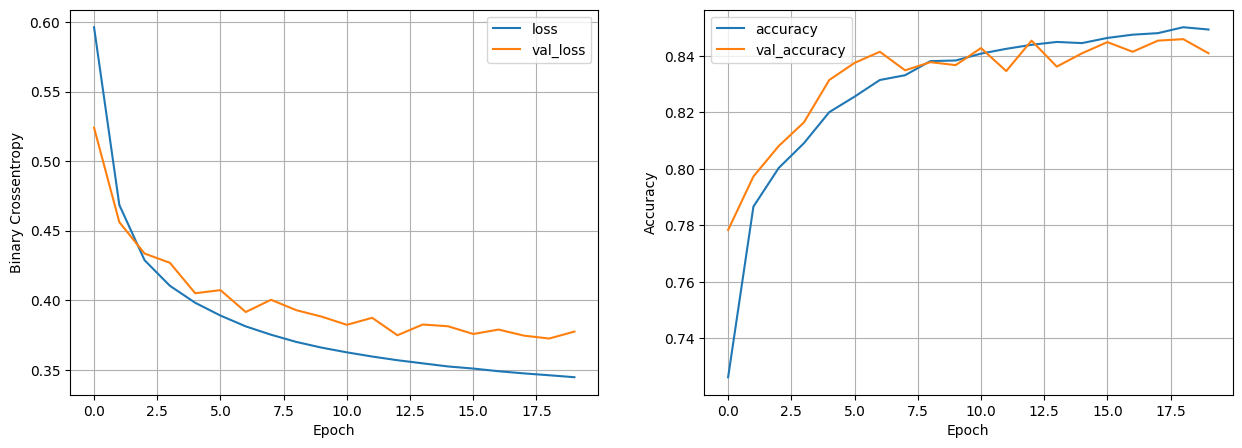

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1358
           1       0.89      0.88      0.88      2446

    accuracy                           0.85      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.85      0.85      0.85      3804

Nodes: 64, Dropout Rate: 0, Learning Rate: 0.0001, Batch Size: 64


C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


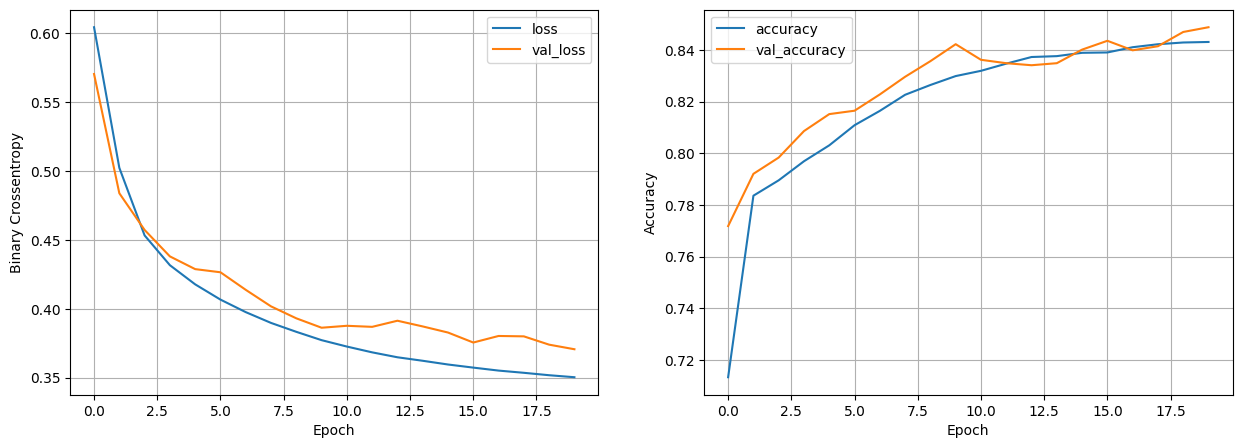

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1358
           1       0.89      0.89      0.89      2446

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804

Nodes: 64, Dropout Rate: 0, Learning Rate: 0.0001, Batch Size: 128


C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


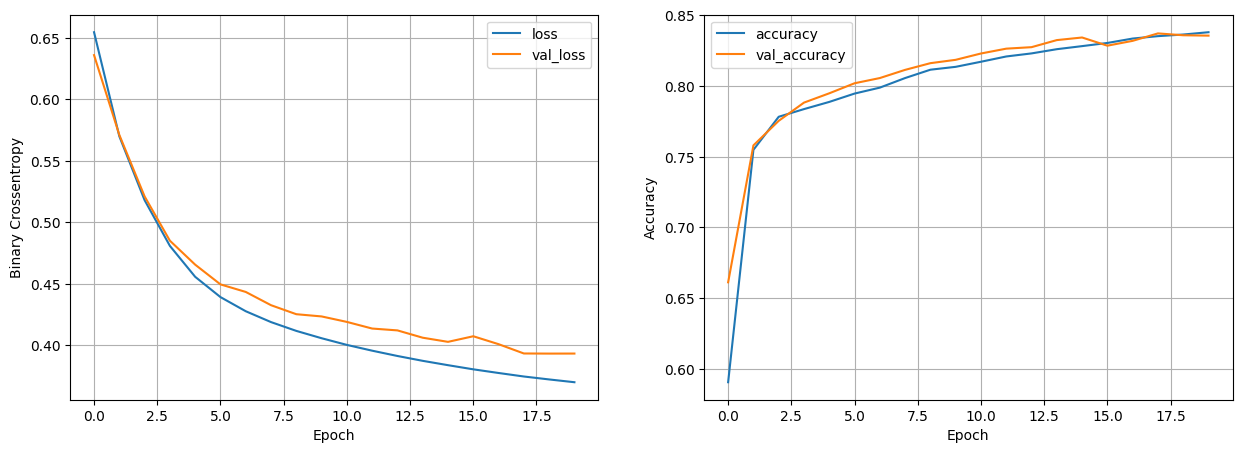

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       0.78      0.79      0.78      1358
           1       0.88      0.87      0.88      2446

    accuracy                           0.84      3804
   macro avg       0.83      0.83      0.83      3804
weighted avg       0.84      0.84      0.84      3804

Nodes: 64, Dropout Rate: 0.2, Learning Rate: 0.01, Batch Size: 32


C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


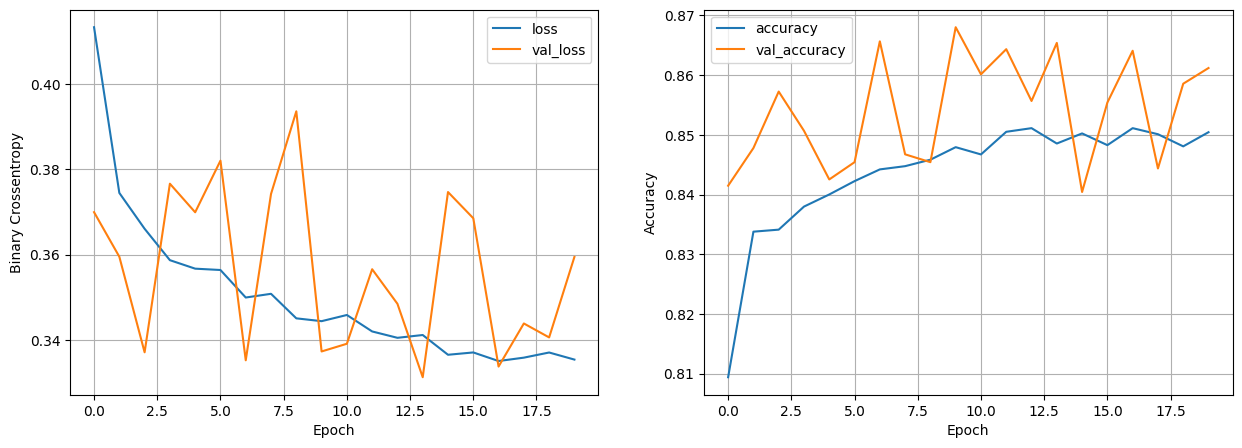

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1358
           1       0.89      0.91      0.90      2446

    accuracy                           0.87      3804
   macro avg       0.86      0.85      0.85      3804
weighted avg       0.87      0.87      0.87      3804

Nodes: 64, Dropout Rate: 0.2, Learning Rate: 0.01, Batch Size: 64


C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


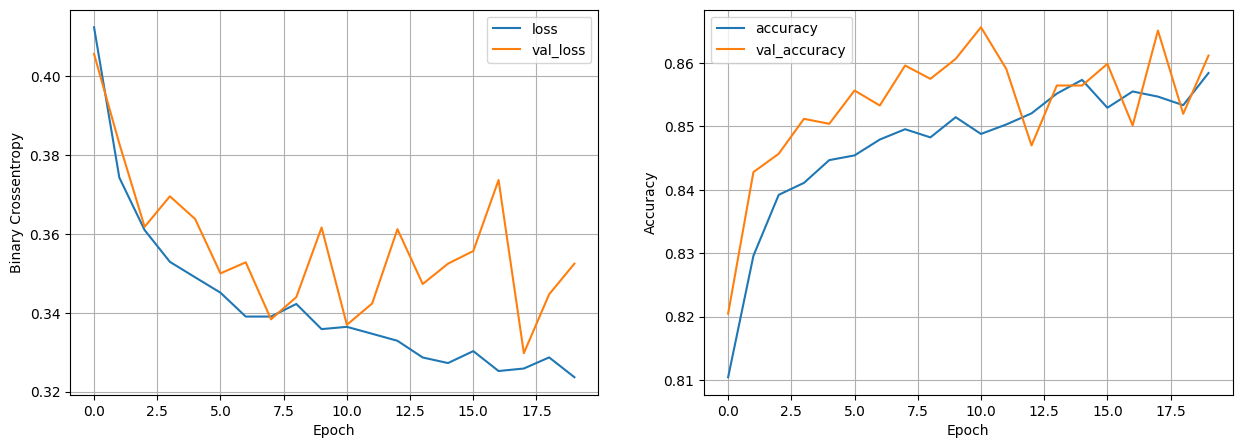

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
              precision    recall  f1-score   support

           0       0.86      0.79      0.82      1358
           1       0.89      0.93      0.91      2446

    accuracy                           0.88      3804
   macro avg       0.87      0.86      0.87      3804
weighted avg       0.88      0.88      0.88      3804

Nodes: 64, Dropout Rate: 0.2, Learning Rate: 0.01, Batch Size: 128


C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


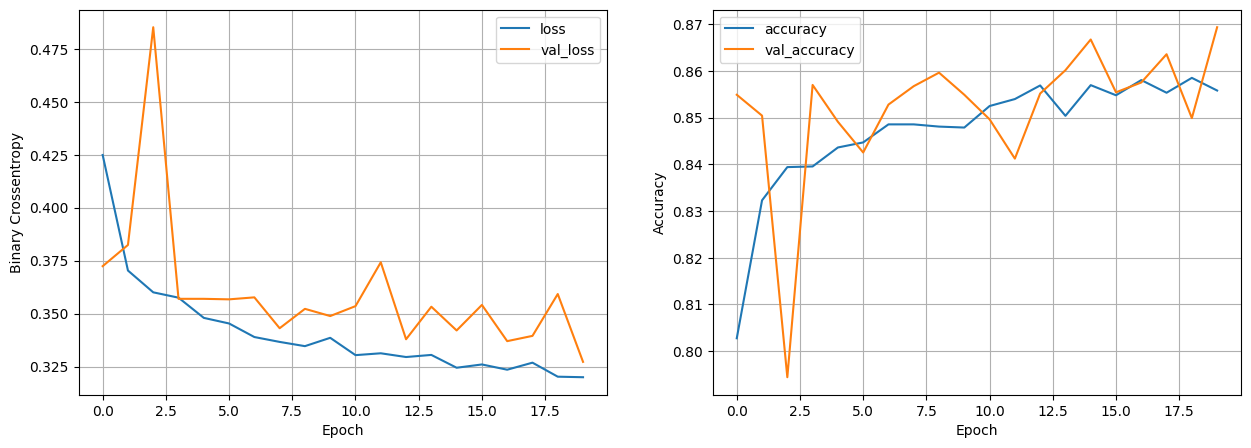

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1358
           1       0.87      0.95      0.91      2446

    accuracy                           0.88      3804
   macro avg       0.88      0.85      0.86      3804
weighted avg       0.88      0.88      0.88      3804

Nodes: 64, Dropout Rate: 0.2, Learning Rate: 0.005, Batch Size: 32


C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


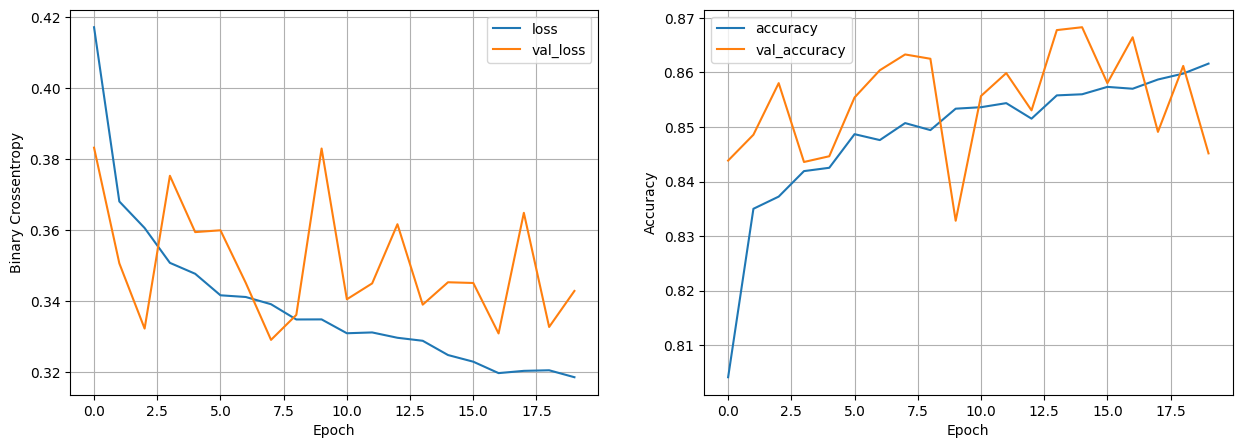

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1358
           1       0.90      0.89      0.90      2446

    accuracy                           0.87      3804
   macro avg       0.86      0.86      0.86      3804
weighted avg       0.87      0.87      0.87      3804

Nodes: 64, Dropout Rate: 0.2, Learning Rate: 0.005, Batch Size: 64


C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


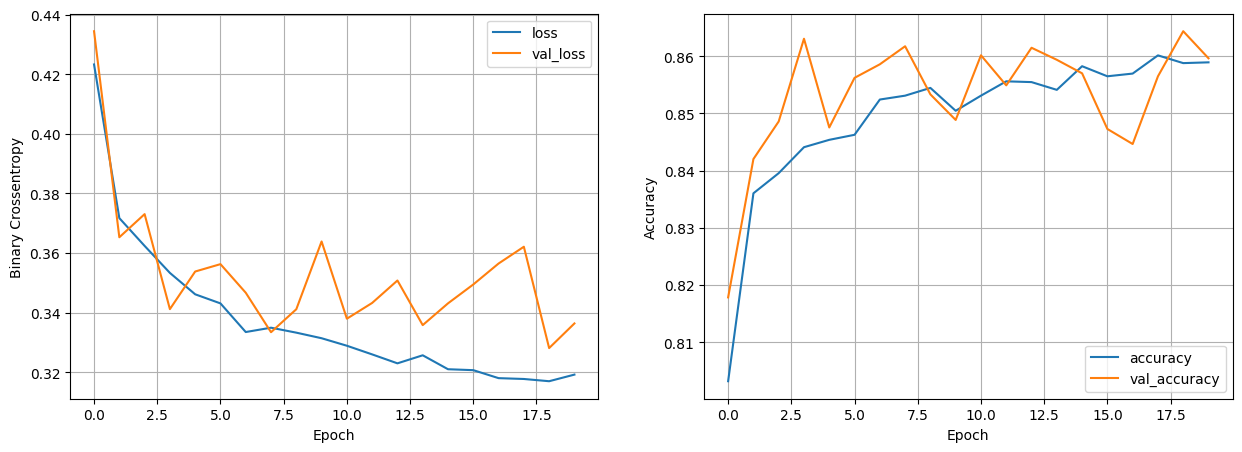

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1358
           1       0.90      0.90      0.90      2446

    accuracy                           0.87      3804
   macro avg       0.86      0.86      0.86      3804
weighted avg       0.87      0.87      0.87      3804

Nodes: 64, Dropout Rate: 0.2, Learning Rate: 0.005, Batch Size: 128


C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


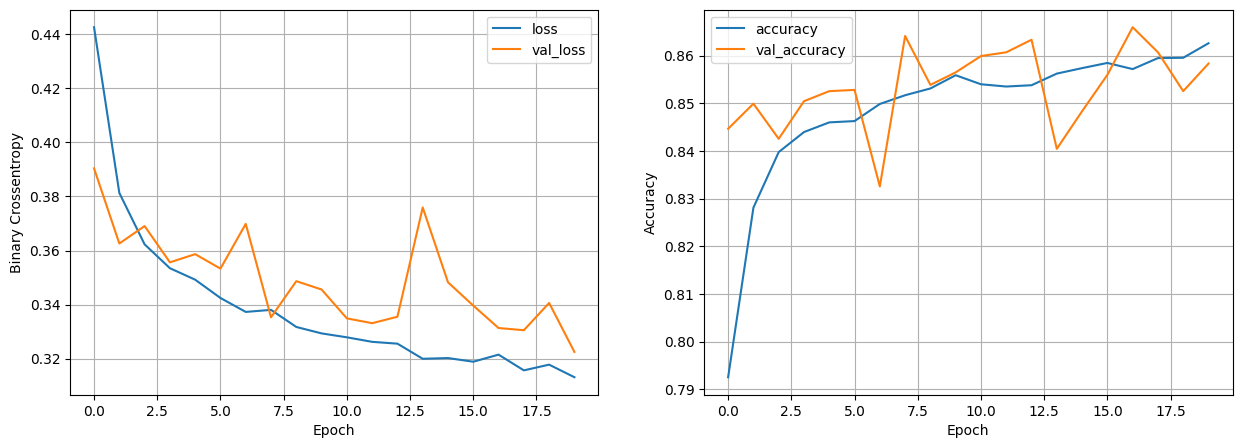

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1358
           1       0.89      0.93      0.91      2446

    accuracy                           0.88      3804
   macro avg       0.87      0.86      0.87      3804
weighted avg       0.88      0.88      0.88      3804

Nodes: 64, Dropout Rate: 0.2, Learning Rate: 0.0001, Batch Size: 32


C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


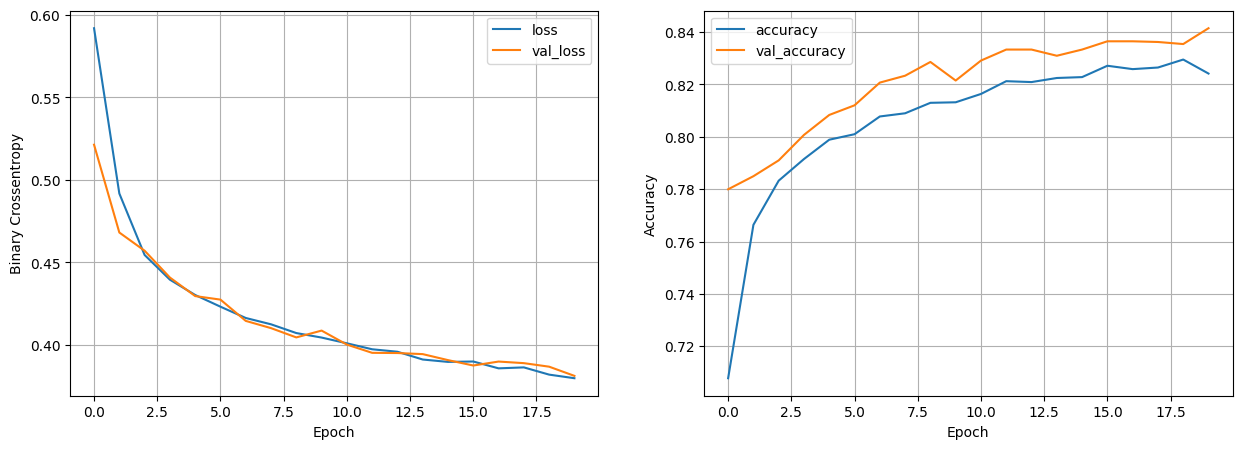

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
              precision    recall  f1-score   support

           0       0.79      0.80      0.80      1358
           1       0.89      0.88      0.89      2446

    accuracy                           0.85      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.85      0.85      0.85      3804

Nodes: 64, Dropout Rate: 0.2, Learning Rate: 0.0001, Batch Size: 64


C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


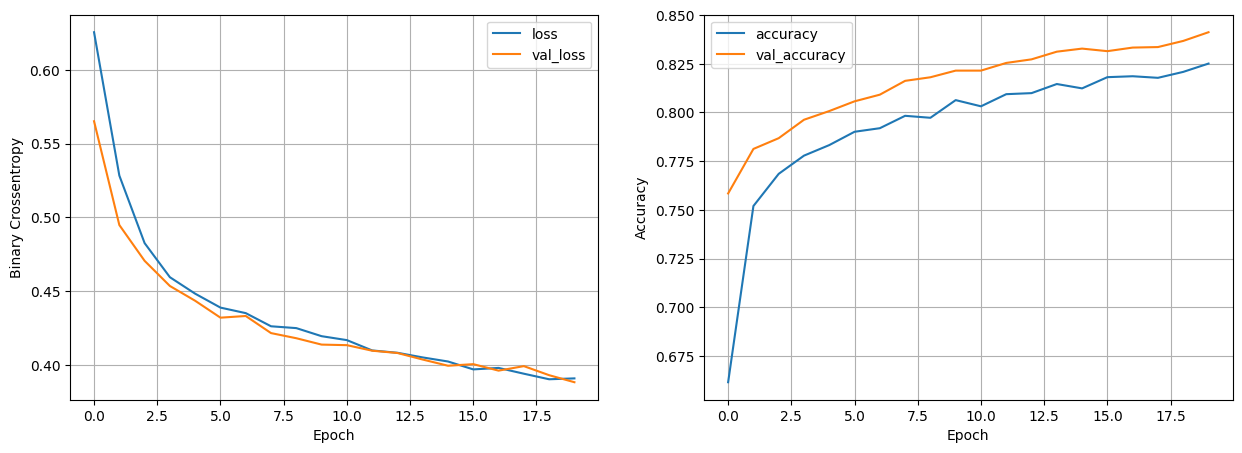

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
              precision    recall  f1-score   support

           0       0.78      0.80      0.79      1358
           1       0.88      0.87      0.88      2446

    accuracy                           0.84      3804
   macro avg       0.83      0.83      0.83      3804
weighted avg       0.85      0.84      0.85      3804

Nodes: 64, Dropout Rate: 0.2, Learning Rate: 0.0001, Batch Size: 128


C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


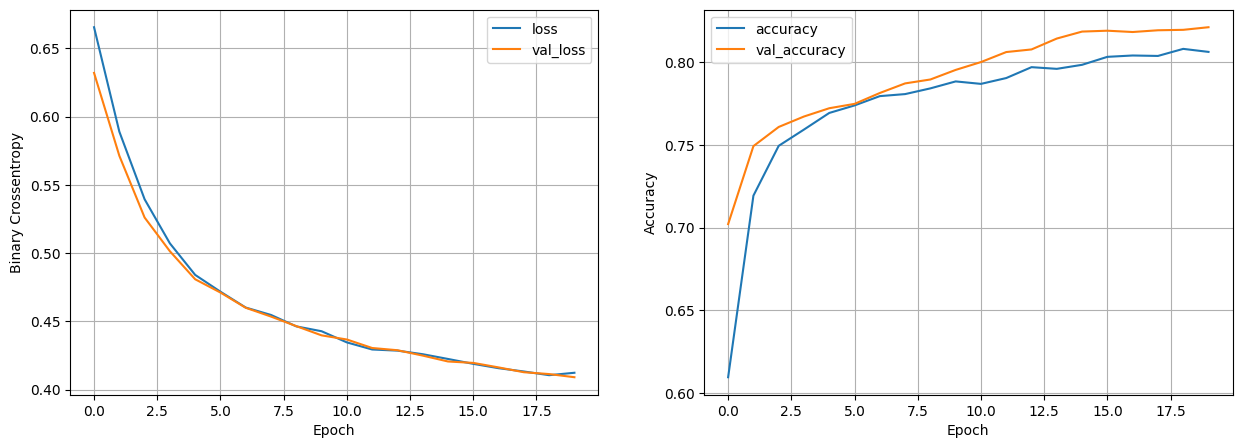

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
              precision    recall  f1-score   support

           0       0.75      0.78      0.76      1358
           1       0.88      0.85      0.86      2446

    accuracy                           0.83      3804
   macro avg       0.81      0.82      0.81      3804
weighted avg       0.83      0.83      0.83      3804

Best Model
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1358
           1       0.89      0.93      0.91      2446

    accuracy                           0.88      3804
   macro avg       0.87      0.86      0.87      3804
weighted avg       0.88      0.88      0.88      3804



In [27]:
least_val_loss = float('inf')
least_loss_model = None
epochs = 20

for num_nodes in [16, 32, 64]:
    for dropout_rate in [0, 0.2]:
        for learning_rate in [0.01, 0.005, 0.0001]:
            for batch_size in [32, 64, 128]:
                print(f"Nodes: {num_nodes}, Dropout Rate: {dropout_rate}, Learning Rate: {learning_rate}, Batch Size: {batch_size}")
                
                model, history = train_model(X_train, Y_train, X_valid, Y_valid, epochs, batch_size, num_nodes, dropout_rate, learning_rate)
                plot_history(history)
                
                val_loss = model.evaluate(X_valid, Y_valid, verbose=0)
                if val_loss[0] < least_val_loss:
                    least_val_loss = val_loss[0]
                    least_loss_model = model
                
                y_pred = model.predict(X_test)
                y_pred = (y_pred > 0.5).astype(int)
                print(classification_report(Y_test, y_pred))

print("Best Model")
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)
print(classification_report(Y_test, y_pred))
